# **Clustering Model for Credit Customer Segmentation**

**`Created by:`**

Michael Nathaniel

---
## **1. Problem Identification**

**`Informasi Dataset:`**

Dataset ini berisi informasi terkait penggunaan kartu kredit oleh nasabah.

**`Objective:`**

Project ini dibuat guna **membuat klasifikasi pengelompokan kredit nasabah suatu bank yang datanya diperoleh data menggunakan BigQuery. Data yang telah dikumpulkan selanjutnya dipahami dan diproses untuk model Clustering. Clustering dilakukan dengan menggunakan Scikit-Learn.**.

**`Problems:`** 

Buatlah model clustering untuk `melakukan Customer Segmentation dari data kartu kredit sebuah bank` dibawah ini. Data ini merupakan `data informasi penggunaan kartu kredit selama 6 bulan terakhir`. 

---
## **2. Query SQL**

Syntax query yang telah dibuat untuk mengambil data dari Google Cloud Platform.

```sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_009_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 1;
```

---
## **3. Import Libraries**

In [79]:
# Melakukan import modul-modul yang akan digunakan pada project kali ini
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.express as px
import pickle
import json
import warnings

---
## **4. Data Loading**

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Dataset yang digunakan pada project ini: `Clustering-Model-for-Credit-Customer-Segmentation.csv`

### **4.1. Mengimport dataset file .csv menjadi Data Frame**

In [80]:
# Membuat Data Frame bernama data yang isinya diambil dari file .csv
data = pd.read_csv("Clustering-Model-for-Credit-Customer-Segmentation.csv")

### **4.2. Menampilkan dataset**

In [81]:
# Code yang memungkinkan kita untuk menampilkan dataFrame tanpa colom yang terpotong karena limitasi ukuran secara default
pd.set_option('display.max_columns', None)

In [82]:
# Menampilkan 10 data random sebagai bentuk pengecekan data loading
data.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4119,6897,1758.979585,0.818182,1199.00,1199.00,0.00,8552.910316,0.090909,0.090909,0.000000,0.636364,17,1,6750.0,11634.387130,422.041626,0.111111,11
3947,5541,438.337653,1.000000,1867.90,1424.87,443.03,128.429272,0.750000,0.500000,0.500000,0.166667,3,24,6500.0,2080.403638,204.877516,0.083333,12
2484,7449,5926.922151,1.000000,2325.75,2325.75,0.00,461.862131,0.500000,0.500000,0.000000,0.250000,3,25,13000.0,1489.518098,1644.757535,0.000000,12
2378,3971,1747.492429,1.000000,0.00,0.00,0.00,1769.875637,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,450.697772,602.964607,0.000000,12
3559,6941,2755.306896,0.909091,2754.49,1974.00,780.49,3193.924548,0.750000,0.416667,0.583333,0.333333,9,43,13000.0,4843.691023,774.603030,0.000000,12
2795,6521,1271.172501,0.909091,0.00,0.00,0.00,1865.939841,0.000000,0.000000,0.000000,0.090909,1,0,4000.0,2099.387435,366.383649,0.000000,11
644,3545,31.050921,1.000000,446.05,0.00,446.05,0.000000,1.000000,0.000000,0.909091,0.000000,0,11,1000.0,387.745745,158.394845,1.000000,11
2858,453,2677.842539,1.000000,149.80,149.80,0.00,2838.173232,0.142857,0.142857,0.000000,0.142857,13,1,3000.0,0.000000,NaN,0.000000,7
3440,239,1469.720674,1.000000,0.00,0.00,0.00,170.376441,0.000000,0.000000,0.000000,0.333333,5,0,1500.0,395.486928,513.397785,0.000000,12
1083,8529,91.639086,1.000000,315.20,147.80,167.40,0.000000,1.000000,0.333333,0.833333,0.000000,0,8,1000.0,231.274641,86.344733,0.250000,6


### **4.3. Menghiraukan warning**

Agar memudahkan kita dalam membaca notebook ini, kita akan melakukan warning ignore.

In [83]:
warnings.filterwarnings('ignore')

### **4.4. Menduplikat dataframe asli**

In [84]:
data_original = data.copy()

---
## **5. Exploratory Data Analysis (EDA)**

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### **5.1. Melihat informasi mengenai Data Frame yang akan digunakan**

In [85]:
# Melihat informasi mengenai dataFrame yang akan digunakan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Dari dataset yang kita miliki, kita temukan bahwa ada sebanyak `18 kolom` berbeda dengan total `4,475 data entries`.

Keseluruhan tipe data `merupakan data numerical` seperti float dan int.

Dataset ini mencakup datadata mengenai kartu kredit seperti id pemilik, saldo, frekuensi transaksi, limit kredit, angsuran, dan data-data sejenis lainnya.

Dari keseluruhan data yang kita miliki, kita temukan bahwa ada satu kolom yang memiliki missing values atau null values, yaitu kolom `MINIMUM_PAYMENTS` dengan total kekosongan mencapai `155 baris/ row`.

Untuk dapat memaksimalkan projek klasifikasi nasabah ini, kita akan terlebih dahulu memahami arti dari setiap kolom satu persatu.

**`Berikut adalah keterangan setiap kolom:`**
- **CUST_ID**: Identifikasi pemilik Kartu Kredit.
- **BALANCE**: Jumlah saldo tersisa di akun nasabah.
- **BALANCE_FREQUENCY**: Menunjukkan seberapa sering saldo di mengalami perubahan.
- **PURCHASES**: Nominal pembelian yang dilakukan.
- **ONEOFF_PURCHASES**: Nominal pembelian maksimum yang dilakukan dalam sekali jalan.
- **INSTALLMENTS_PURCHASES**: Nominal pembelian dilakukan secara angsuran.
- **CASH_ADVANCE**: Uang tunai di muka yang diberikan oleh nasabah.
- **PURCHASES_FREQUENCY**: Seberapa sering pembelian dilakukan, skornya antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui).
- **ONEOFF_PURCHASES_FREQUENCY**: Seberapa sering pembelian dilakukan dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli).
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan).
- **CASH_ADVANCE_FREQUENCY**: Seberapa sering uang tunai di muka dibayarkan.
- **CASH_ADVANCE_TRX**: Jumlah Transaksi yang Dilakukan dengan 'Uang Tunai di Muka'.
- **PURCHASES_TRX**: Jumlah transaksi pembelian yang dilakukan.
- **CREDIT_LIMIT**: Batas Kartu Kredit untuk nasabah.
- **PAYMENTS**: Jumlah Pembayaran yang dilakukan oleh nasabah.
- **MINIMUM_PAYMENTS**: Jumlah minimum untuk pembayaran yang dilakukan oleh nasabah.
- **PRC_FULL_PAYMENT**: Persentase pembayaran penuh yang dibayarkan oleh nasabah.
- **TENURE**: Tenor kartu kredit bagi nasabah.

### **5.2. Melihat deskripsi Data Frame yang akan digunakan**

Kita akan melihat deskripsi karakter dataset menggunakan method `.agg()`

Yang ingin kita lihat pada tahap ini adalah bagaimana `distribusi datanya, rata-rata, skewness, dll`.

Kita bisa melihat suatu data memiliki distribusi yang normal atau tidak dari beberapa cara seperti:
- Membandingkan mean dan median (`bila relatif sama, maka bisa diasumsikan bahwa distribusinya normal`)
- Melihat nilai skewness (`distribusi normal bila skewness diantara -0.5 hingga 0.5`)

In [86]:
# Menggunakan meethode .agg() untuk memprint deskripsi yang diperlukan.
# Tidak memakai .desc() agar lebih efisien dengan langsung memprint yang kita butuhkan.
describe_numeric = data.select_dtypes(include='number').agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max'])
describe_numeric.T

,count,skew,kurt,std,mean,median,min,max
CUST_ID,4475.0,0.000000,-1.200000,2583.931114,4475.000000,4475.000000,1.000000,8949.00000
BALANCE,4475.0,2.329009,7.181574,2072.045789,1563.205717,871.355430,0.000000,18495.55855
BALANCE_FREQUENCY,4475.0,-2.026530,3.099104,0.238222,0.876933,1.000000,0.000000,1.00000
PURCHASES,4475.0,7.071706,85.129517,2060.034730,1003.251343,360.000000,0.000000,41050.40000
ONEOFF_PURCHASES,4475.0,9.951057,164.111661,1653.425984,596.369893,45.650000,0.000000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,6.330630,65.335628,880.799744,407.110215,88.620000,0.000000,14686.10000
CASH_ADVANCE,4475.0,5.638109,73.399145,2060.448056,984.288554,0.000000,0.000000,47137.21176
PURCHASES_FREQUENCY,4475.0,0.058755,-1.649169,0.402907,0.490579,0.500000,0.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,1.548319,1.198458,0.298203,0.202301,0.083333,0.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.508296,-1.403919,0.397603,0.363886,0.166667,0.000000,1.00000


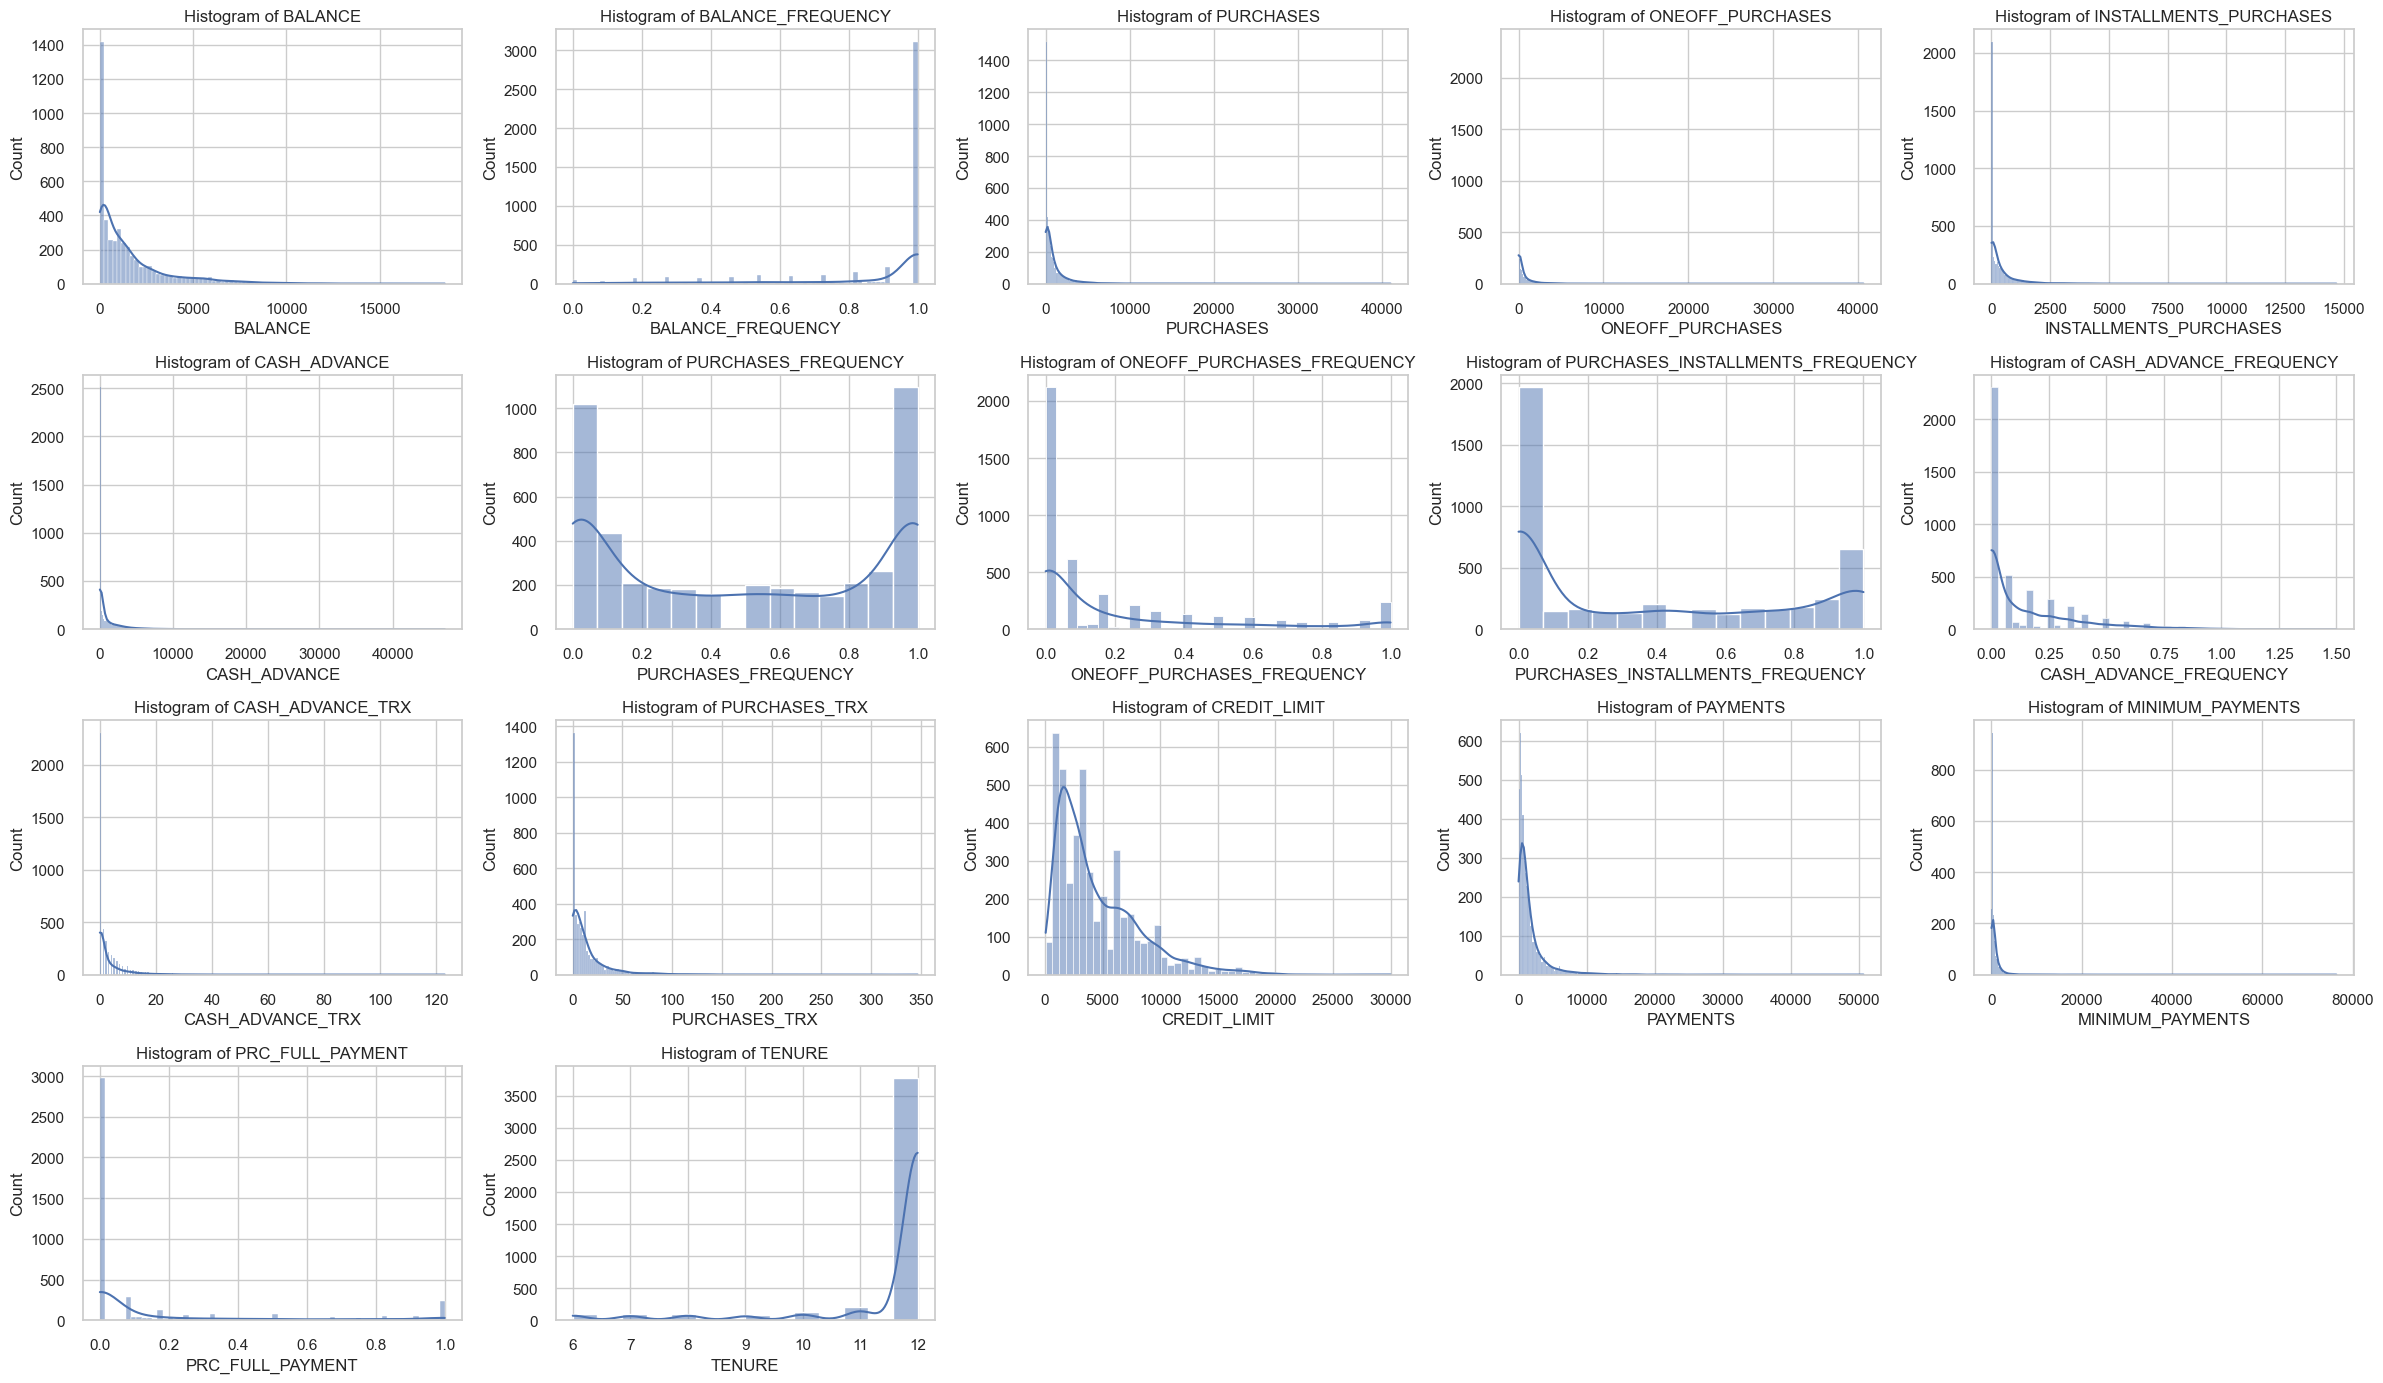

In [87]:
# Menghapus kolom 'CUST_ID' dari DataFrame 'data' dan menyimpannya ke dalam 'data_num'
data_num = data.drop(columns=['CUST_ID'])

# Membuat plot berukuran 24x14
plt.figure(figsize=(24, 14))

# Iterasi melalui setiap kolom numerik dalam 'data_num'
for i, col in enumerate(data_num, 1):
    # Membuat subplot dengan ukuran 4 baris x 5 kolom dan mengambil nomor subplot ke-i
    plt.subplot(4, 5, i)
    
    # Membuat histogram dan KDE plot menggunakan seaborn untuk kolom numerik saat ini
    sns.histplot(data_num[col], kde=True)
    
    # Menambahkan judul untuk setiap subplot berdasarkan nama kolom
    plt.title(f'Histogram of {col}')

# Mengatur tata letak subplot agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari melihat deskripsi dataset yang kita miliki, kita mengetahui bahwa banyak kolom yang mengalami distribusi data yang tidak normal.

Selain itu, dilihat dari skewness (kemiringan data), terdapat beberapa kolom yang memiliki tingkatan skewness yang ekstrem.

### **5.3. Memeriksa missing value dan outlier**

Untuk memaksimalkan model pengelompokkan (clustering) yang kita buat, kita akan melakukam handling missing value dan juga outliers.

In [88]:
# Menghitung jumlah nilai yang hilang (missing values) untuk setiap kolom dalam dataset
missing_values = data.isnull().sum()

# Menghitung persentase nilai yang hilang dari total panjang dataset untuk setiap kolom
missing_value_percentage = (missing_values / len(data)) * 100

# Menghitung nilai kuartil pertama (Q1), kuartil ketiga (Q3), dan rentang interquartil (IQR) untuk setiap kolom numerik
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah (lower_bound) dan batas atas (upper_bound) untuk deteksi outlier dengan metode IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier untuk setiap kolom numerik menggunakan metode IQR
outliers = ((data < lower_bound) | (data > upper_bound)).sum()

# Menghitung persentase outlier dari total panjang dataset untuk setiap kolom numerik
outlier_percentage = (outliers / len(data)) * 100

# Membuat DataFrame yang berisi ringkasan hasil perhitungan, termasuk jumlah missing values, persentase missing values, jumlah outliers, dan persentase outliers untuk setiap kolom
summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_value_percentage,
    'Outliers': outliers,
    'Outlier %': outlier_percentage
})

# Menampilkan ringkasan
summary

,Missing Values,Missing %,Outliers,Outlier %
CUST_ID,0,0.000000,0,0.000000
BALANCE,0,0.000000,359,8.022346
BALANCE_FREQUENCY,0,0.000000,748,16.715084
PURCHASES,0,0.000000,424,9.474860
ONEOFF_PURCHASES,0,0.000000,523,11.687151
INSTALLMENTS_PURCHASES,0,0.000000,442,9.877095
CASH_ADVANCE,0,0.000000,504,11.262570
PURCHASES_FREQUENCY,0,0.000000,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,0,0.000000,557,12.446927
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000,0,0.000000


Dari hasil pengecekan, kita temukan bahwa ada satu kolom yang memiliki missing value yaitu `kolom 'MINIMUM_PAYMENTS' dengan 155 kolom mengalami missing value (3.46% dari total data keseluruhan)`.

Kita bisa lihat juga bahwa `banyak kolom yang memiliki outliers` yang dimana besaran outlies yang ekstrem berkisar antara 5-18%.

Selanjutnya, kita akan melakukan visualisasi untuk outliers setiap kolom untuk memberikan kita sudut pandang lain terhadap outliersnya.

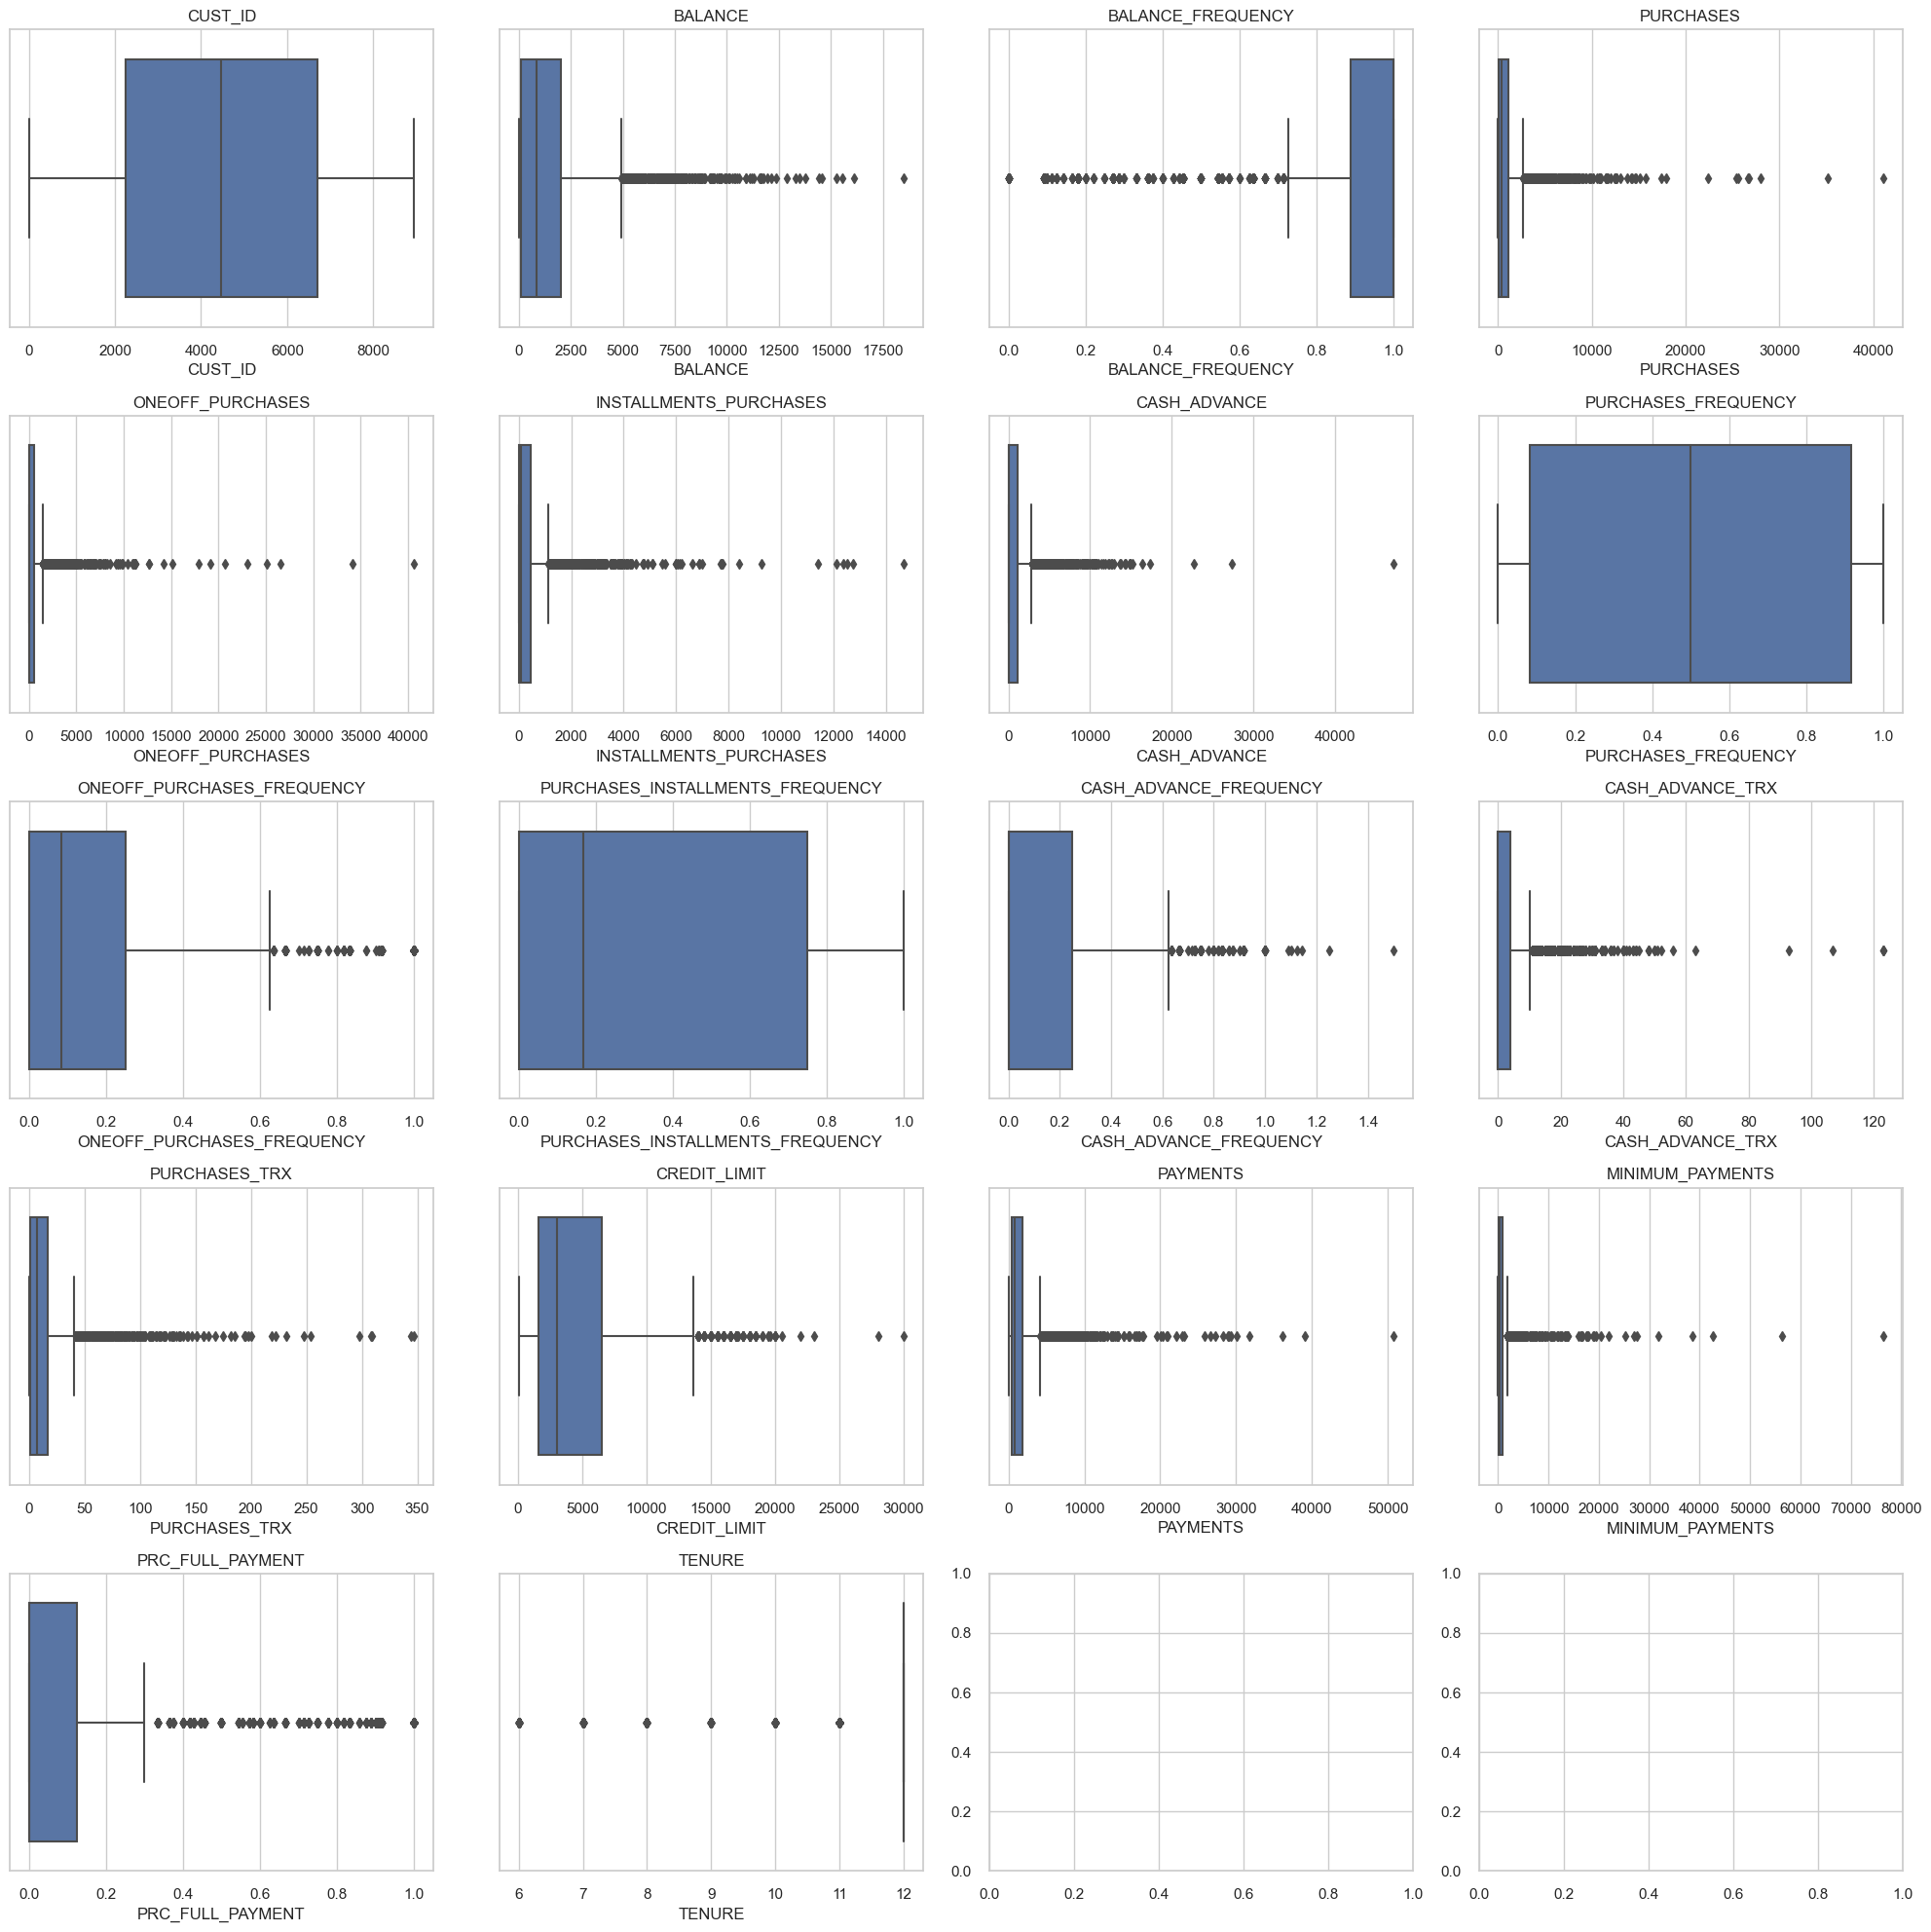

In [89]:
# Atur gaya untuk visualisasi
sns.set(style="whitegrid")

# Buat gambar dan sumbu untuk setiap kolom
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Ratakan sumbu untuk memudahkan iterasi
axes = axes.flatten()

# Gambarkan setiap kolom
for i, column in enumerate(data.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column)

# Sesuaikan tata letak
plt.tight_layout()
plt.show()

### **5.4. Melihat data yang mengandung missing value**

Setelah mengetahui bahwa missing value banyak terjadi pada kolom 'MINIMUM_PAYMENTS', kita akan lihat, data apa saja yang mengalami missing value pada kolom MINIMUM_PAYMENTS.

In [90]:
# Mencetak DataFrame hanya untuk baris yang memiliki nilai yang hilang
data[data.isnull().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000000,176.03,176.03,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
6,8629,0.228572,0.125000,60.00,60.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,1500.0,438.738982,NaN,0.0,8
21,883,1464.324632,1.000000,1174.39,1174.39,0.0,0.000000,0.250,0.250,0.0,0.000000,0,8,9000.0,0.000000,NaN,0.0,12
25,1173,16.887571,0.363636,1083.00,1083.00,0.0,0.000000,0.250,0.250,0.0,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,2693,19.949534,0.111111,0.00,0.00,0.0,326.731167,0.000,0.000,0.0,0.111111,5,0,2500.0,0.000000,NaN,0.0,9
4272,2813,0.000000,0.000000,0.00,0.00,0.0,253.887233,0.000,0.000,0.0,0.111111,1,0,500.0,2437.932505,NaN,0.0,9
4274,3943,8.187263,0.111111,0.00,0.00,0.0,793.848237,0.000,0.000,0.0,0.111111,1,0,1350.0,0.000000,NaN,0.0,9
4276,5999,25.998899,0.111111,0.00,0.00,0.0,466.387778,0.000,0.000,0.0,0.111111,1,0,4000.0,0.000000,NaN,0.0,9


Dari hasil pengecekan, kita temukan bahwa missing value yang terjadi pada kolom 'MINIMUM_PAYMENTS' merupakan kategori Missing At Completely Random. 

Sehingga nantinya akan aman jika kita handle dengan drop missing value.

### **5.4. Melihat data yang memiliki duplikat**

Berikutnya kita akan mengecek apakah ada data yang memiliki duplikat. Kita akan menggunakan method `.duplicated().sum()`

In [91]:
# Menghitung jumlah baris yang duplikat menggunakan metode .duplicated() dan .sum()
data.duplicated().sum()

0

In [92]:
# Menampilkan data-data yang memiliki duplikat.
data[data.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Dari hasil pengecekan, kita `tidak menemukan data yang memiliki duplikat pada dataset ini`.

### **5.5. Melihat Unique Value**

Sebagai bentuk pemahaman akan data secara lebih dalam, kita akan melihat unique values dari kolom-kolom yang ada dalam dataset ini.

In [93]:
# Melihat banyak nya unique value
data.nunique()

CUST_ID                             4475
BALANCE                             4433
BALANCE_FREQUENCY                     43
PURCHASES                           3203
ONEOFF_PURCHASES                    2093
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2169
PURCHASES_FREQUENCY                   46
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
PAYMENTS                            4362
MINIMUM_PAYMENTS                    4319
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Kita temukan bahwa `kolom TENURE menjadi kolom yang tergolong low cardinliaty dengan unique valuenya adalah 7`.

Berikutnya kita akan memprint unique value dari setiap kolom pada dataset ini.

In [94]:
# Loop untuk setiap kolom
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in CUST_ID: [3091 5069 6075 ... 7347 8447 1995]
Unique values in BALANCE: [   3.833185    0.        757.964752 ... 1322.818587 1060.391273
 3447.674222]
Unique values in BALANCE_FREQUENCY: [0.125    0.       0.875    0.375    1.       0.454545 0.727273 0.545455
 0.363636 0.909091 0.272727 0.625    0.636364 0.818182 0.181818 0.5
 0.833333 0.7      0.3      0.6      0.25     0.75     0.090909 0.888889
 0.285714 0.428571 0.142857 0.571429 0.2      0.4      0.9      0.8
 0.333333 0.666667 0.444444 0.166667 0.555556 0.714286 0.857143 0.777778
 0.1      0.222222 0.111111]
Unique values in PURCHASES: [ 45.   176.03 157.4  ... 797.5  285.07 205.  ]
Unique values in ONEOFF_PURCHASES: [ 45.   176.03 157.4  ... 577.83 285.07 205.  ]
Unique values in INSTALLMENTS_PURCHASES: [  0.   178.15 114.   ... 482.68  92.07 219.67]
Unique values in CASH_ADVANCE: [   0.       1982.368623 1175.358928 ...  762.301096 1475.858013
 4548.057776]
Unique values in PURCHASES_FREQUENCY: [0.125    0.25   

### **5.6. Melihat data Frequency yang nilainya lebih dari 1**

Kita telah mengetahui bahwa data-data mengenai frekuensi memiliki rentang dari 0 sampai dengan 1.

Kita akan memeriksa apakah ada data yang frekuensi yang nilainya lebih dari 1.

In [95]:
# Memilih kolom frekuensi dari data
data_freq = data[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']]

# Melakukan seleksi pada data untuk menemukan baris dengan nilai frekuensi lebih besar dari 1
# Ini digunakan untuk memeriksa apakah ada nilai frekuensi yang tidak masuk akal (harusnya antara 0 dan 1)
data_freq.loc[
    (data.BALANCE_FREQUENCY > 1) |
    (data.PURCHASES_FREQUENCY > 1) |
    (data.ONEOFF_PURCHASES_FREQUENCY > 1) |
    (data.PURCHASES_INSTALLMENTS_FREQUENCY > 1) |
    (data.CASH_ADVANCE_FREQUENCY > 1)
]

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
2776,1.0,0.125000,0.125000,0.0,1.125000
2777,1.0,0.250000,0.250000,0.0,1.250000
2778,1.0,0.000000,0.000000,0.0,1.500000
3405,1.0,0.000000,0.000000,0.0,1.142857
4161,1.0,0.100000,0.100000,0.0,1.100000
4469,1.0,0.363636,0.363636,0.0,1.090909


Dari pengecekan diatas, kita temukan sebanyak 6 baris data yang memiliki nilai frekuensi diatas 1 yang keenamnya terjadi pada kolom CASH_ADVANCE_FREQUENCY.

Karena jumlahnya sedikit, kita akan membulatkannya menjadi 1.

### **5.7. Melihat perbandingan behaviour nasabah dalam menggunakan kredit**

Kita ingin melihat bagaimana behaviour nasabah dalam menggunakan kredit mereka, baik ambil tunai, sekali bayar, maupun angsuran.

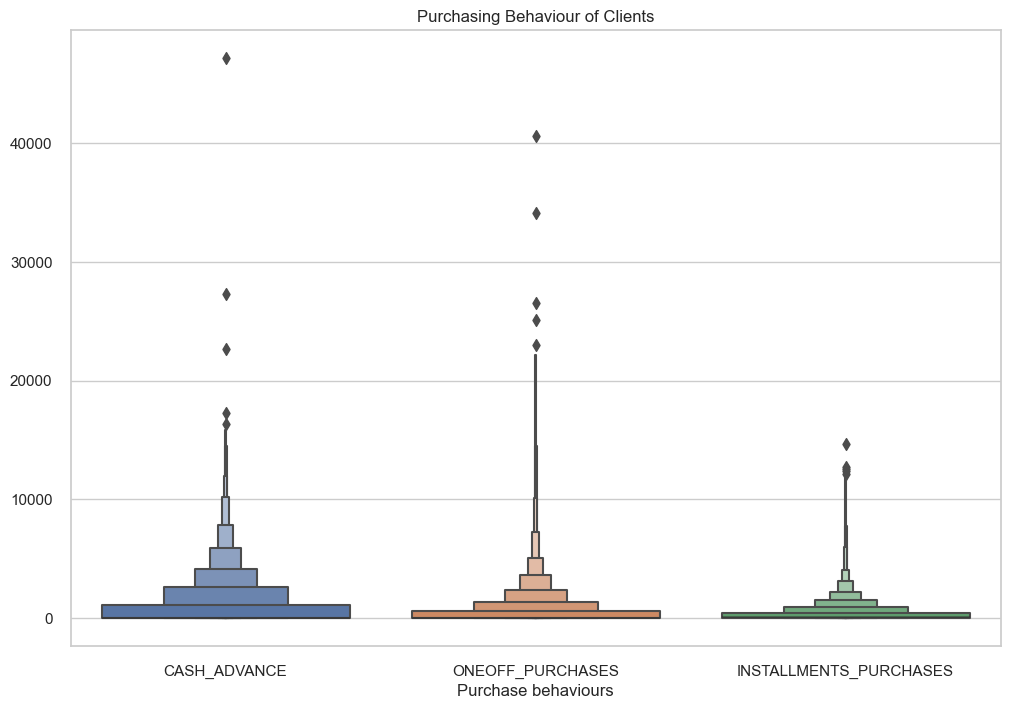

In [96]:
# Membuat plot dengan ukuran 12x8
plt.figure(figsize=(12, 8))

# Membuat boxen plot menggunakan seaborn untuk kolom 'CASH_ADVANCE', 'ONEOFF_PURCHASES', dan 'INSTALLMENTS_PURCHASES'
sns.boxenplot(data=data[['CASH_ADVANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']])

# Menambahkan label sumbu x dengan keterangan 'Purchase behaviours'
plt.xlabel('Purchase behaviours')

# Menambahkan judul plot dengan keterangan 'Purchasing Behaviour of Clients'
plt.title('Purchasing Behaviour of Clients')

# Menampilkan plot
plt.show()

Dari hasil visualisasi diatas, kita temukan bahwa `banyak nasabah yang melakukan penarikan dana dari kredit daripada melakukan pembayaran`.

Selain itu, kita temukan juga bahwa lebih `banyak orang yang menggunakan kredit mereka untuk melakukan pembelian sekali jalan daripada pembelian secara cicil atau angsuran`.

Hal ini mungkin terjadi karena `lebih banyak orang menggunakan kredit untuk memperoleh benefitnya dibandingkan karena keadaan finansial mereka`.

### **5.8 Melihat Distribusi Jumlah Saldo Nasabah**

Kita akan melihat bagaimana distribusi saldo nasabah pada bank.

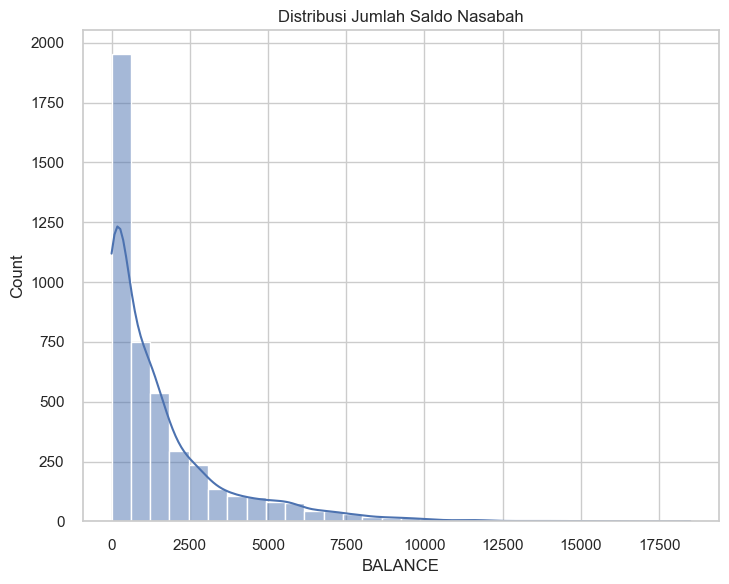

In [97]:
# Membuat plot dengan ukuran 14x6
plt.figure(figsize=(14, 6))

# Membuat subplot dengan 1 baris dan 2 kolom, dan mengambil subplot pertama
plt.subplot(1, 2, 1)

# Membuat histogram menggunakan seaborn untuk distribusi jumlah saldo nasabah
sns.histplot(data['BALANCE'], bins=30, kde=True)

# Menambahkan judul subplot dengan keterangan 'Distribusi Jumlah Saldo Nasabah'
plt.title('Distribusi Jumlah Saldo Nasabah')

# Mengatur tata letak subplot agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari hasil visualisasi, kita temukan bahwa `ada banyak nasabah yang memiliki saldo kecil pada rekenening mereka yaitu hingga mencapai 2000 nasabah`.

Jumlah ini tergolong sangat signifikan dibanding mereka yang memiliki saldo lebih banyak setelahnya.

### **5.9 Melihat Perbandingan Pembeliian dengan Frekuensi Pembelian**

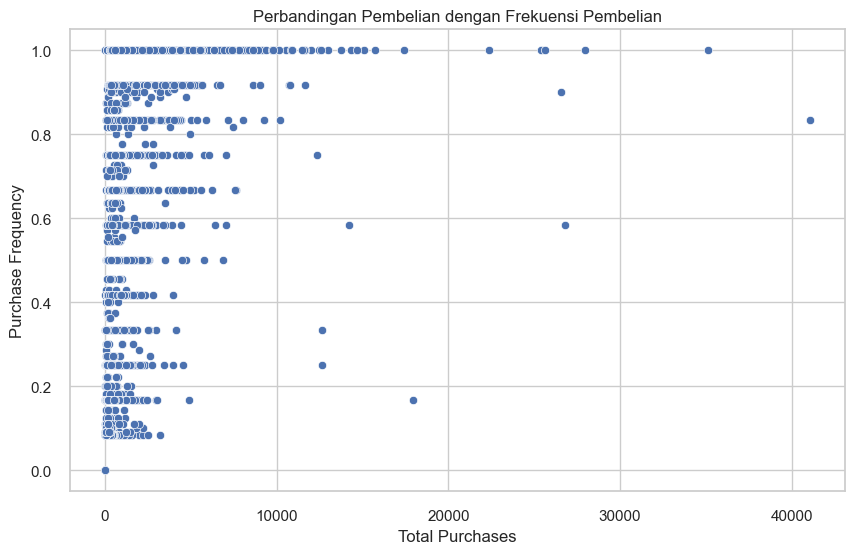

In [98]:
# Membuat scatter plot antara 'PURCHASES' dan 'PURCHASES_FREQUENCY'
plt.figure(figsize=(10, 6))

# Membuat scatter plot menggunakan seaborn untuk membandingkan jumlah pembelian dengan frekuensi pembelian
sns.scatterplot(x='PURCHASES', y='PURCHASES_FREQUENCY', data=data)

# Menambahkan label sumbu x dengan keterangan 'Total Purchases'
plt.xlabel('Total Purchases')

# Menambahkan label sumbu y dengan keterangan 'Purchase Frequency'
plt.ylabel('Purchase Frequency')

# Menambahkan judul plot dengan keterangan 'Perbandingan Pembelian dengan Frekuensi Pembelian'
plt.title('Perbandingan Pembelian dengan Frekuensi Pembelian')

# Menampilkan plot
plt.show()

Kita dapat menemukan beberapa anomali pada data ini.

### **5.10 Perbandingan Pengambilan Uang Tunai dengan Frekuensi Pengambilan Uang Tunai**

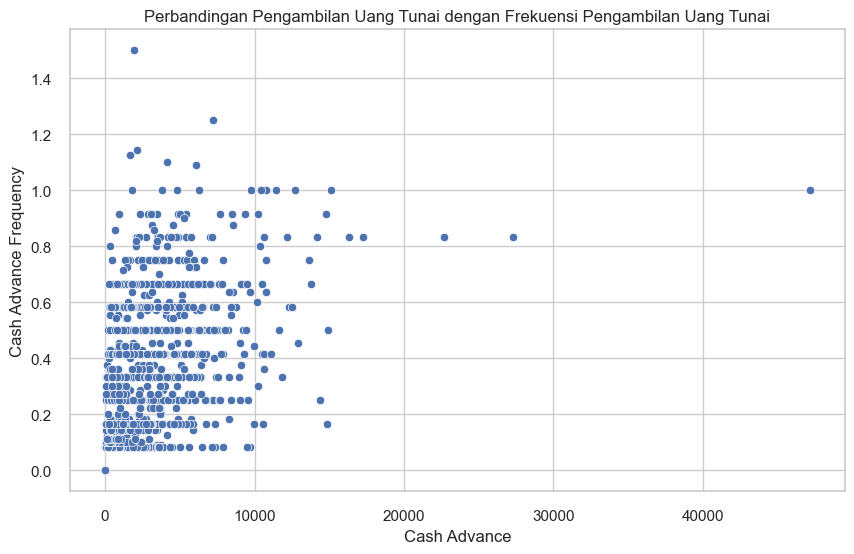

In [99]:
# Membuat scatter plot antara 'CASH_ADVANCE' dan 'CASH_ADVANCE_FREQUENCY'
plt.figure(figsize=(10, 6))

# Membuat scatter plot menggunakan seaborn untuk membandingkan jumlah uang tunai yang diambil dengan frekuensi pengambilan uang tunai
sns.scatterplot(x='CASH_ADVANCE', y='CASH_ADVANCE_FREQUENCY', data=data)

# Menambahkan label sumbu x dengan keterangan 'Cash Advance'
plt.xlabel('Cash Advance')

# Menambahkan label sumbu y dengan keterangan 'Cash Advance Frequency'
plt.ylabel('Cash Advance Frequency')

# Menambahkan judul plot dengan keterangan 'Perbandingan Pengambilan Uang Tunai dengan Frekuensi Pengambilan Uang Tunai'
plt.title('Perbandingan Pengambilan Uang Tunai dengan Frekuensi Pengambilan Uang Tunai')

# Menampilkan plot
plt.show()

Kita dapat menemukan beberapa anomali pada data ini.

### **5.11 Melihat distribusi tenure**

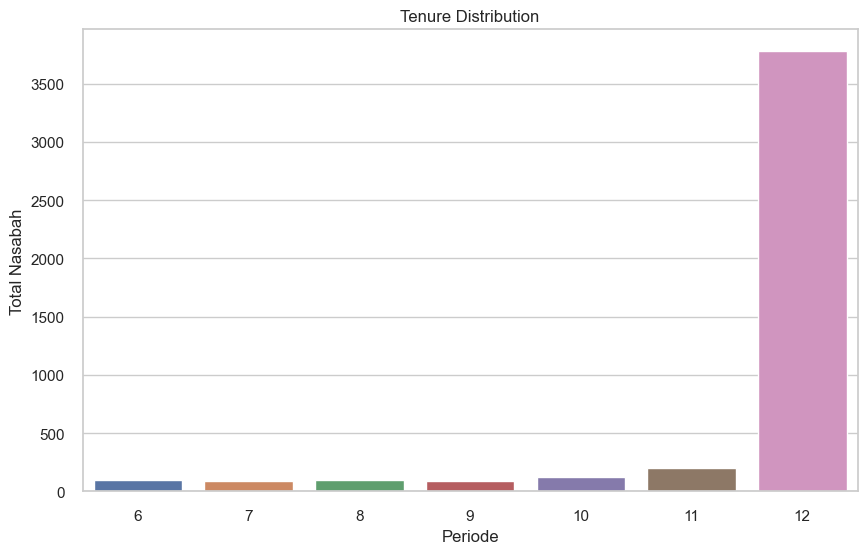

In [100]:
# Membuat plot dengan ukuran 10x6
plt.figure(figsize=(10, 6))

# Membuat count plot menggunakan seaborn untuk distribusi TENURE
sns.countplot(x='TENURE', data=data)

# Menambahkan judul plot dengan keterangan 'Tenure Distribution'
plt.title('Tenure Distribution')

# Menambahkan label sumbu x dengan keterangan 'Periode'
plt.xlabel('Periode')

# Menambahkan label sumbu y dengan keterangan 'Total Nasabah'
plt.ylabel('Total Nasabah')

# Menampilkan plot
plt.show()

Dari visualisasi diatas, kita temukan bahwa tenur 12 bulan menjadi yang paling sering diambil oleh nasabah. Jumlahnya pun sangat signifikan dibandingkan yang lainnya.

---
## **6. Feature Engineering**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### **6.1. Cash Advance Frequency Error**

Beberapa entri dari cash_advance_frekuensi terbukti memiliki nilai lebih besar dari 1 padahal seharusnya paling banyak 1. Nilai entri ini akan dibulatkan ke bawah menjadi 1 untuk konsistensi.

In [101]:
data.loc[data['CASH_ADVANCE_FREQUENCY'] > 1, 'CASH_ADVANCE_FREQUENCY'] = 1

### **6.2. Melakukan Handling Missing Value**

Pada tahap ini, kita akan melakukan tahap handling missing value dengan metode drop column.

Kita bisa melakukan ini karena presentasi missing value yang rendah yaitu 3.46% yang dimana presentase ini tergolong rendah dan tidak akan terlalu mengganggui hasil clustering.

In [102]:
# Menghapus rows yang memiliki missing value
data.dropna(inplace=True)

Kemudian kita akan mengecek kembali hasil handling missing value kita

In [103]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Setelah kita cek, dapat kita lihat bahwa kita tidak lagi memiliki data kosong.

### **6.3. Melakukan Drop Columns**

Kita akan mendrop kolom yang tidak berguna untuk clustering dan berpotensi merusak model.

In [104]:
# Menghapus kolom 'CUST_ID' dari dataframe
data.drop(columns=['CUST_ID'], inplace=True)

### **6.4. Melakukan Handling Outliers**

Untuk memperoleh hasil klustering yang maksimal, kita akan menghandling outliers ke beberapa kolom pilihan.

Sebelum itu, kita akan memvisualisasikan terlebih dahulu distribusinya sebagai pembanding.

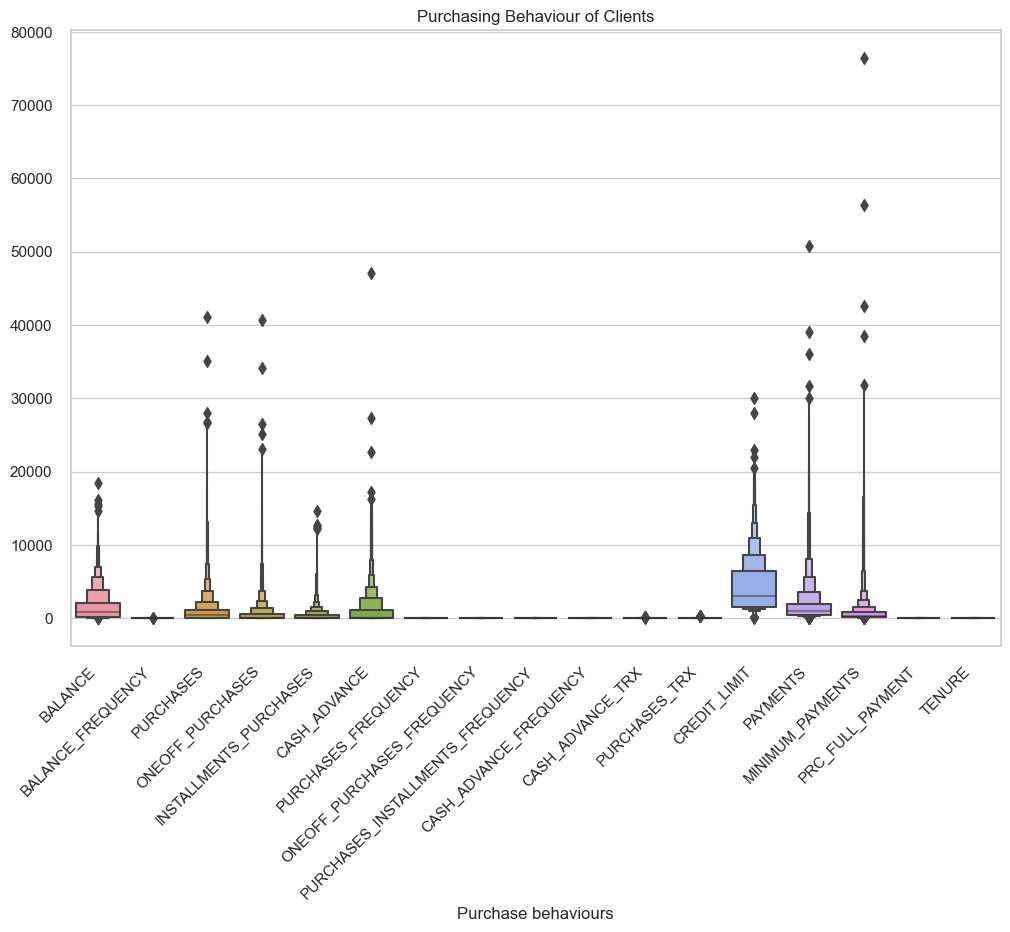

In [105]:
# Membuat figure dengan ukuran 12x8 inci
plt.figure(figsize=(12, 8))

# Membuat boxen plot menggunakan seaborn dengan data yang diberikan
ax = sns.boxenplot(data=data)

# Menyesuaikan label sumbu x agar miring dengan rotasi 45 derajat dan penyesuaian horizontal ke kanan
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Menambahkan label pada sumbu x
plt.xlabel('Purchase behaviours')

# Menambahkan judul plot
plt.title('Purchasing Behaviour of Clients')

# Menampilkan plot
plt.show()

Kita akan memilih beberapa kolom tertentu untuk dilakukan handling outliers.

Kita `tidak menghandling BALANCE dan CREDIT_LIMIT karena merupakan natural outliers dan logis`.

Kita akan melakukan handling outliers menggunakan `metode Winsorizer`.


Winsorizing digunakan untuk menangani outlier dalam data dengan menggantikan atau memotong nilai-nilai ekstrem, sehingga mempertahankan informasi esensial tanpa gangguan dari outlier. Ini membantu menjaga stabilitas analisis data dan distribusinya.

In [106]:
# Daftar kolom yang akan ditangani outliers
columns_to_winsorize = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']

# Inisialisasi Winsorizer untuk setiap kolom numerik
for column in columns_to_winsorize:
    winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[column])
    
    # Fit dan transform data untuk menangani outliers pada kolom tertentu
    data[column] = winsorizer.fit_transform(data[[column]])[column]

Kita akan memvisualisasikan kembali data yang telah kita handling outliers untuk membukatikan.

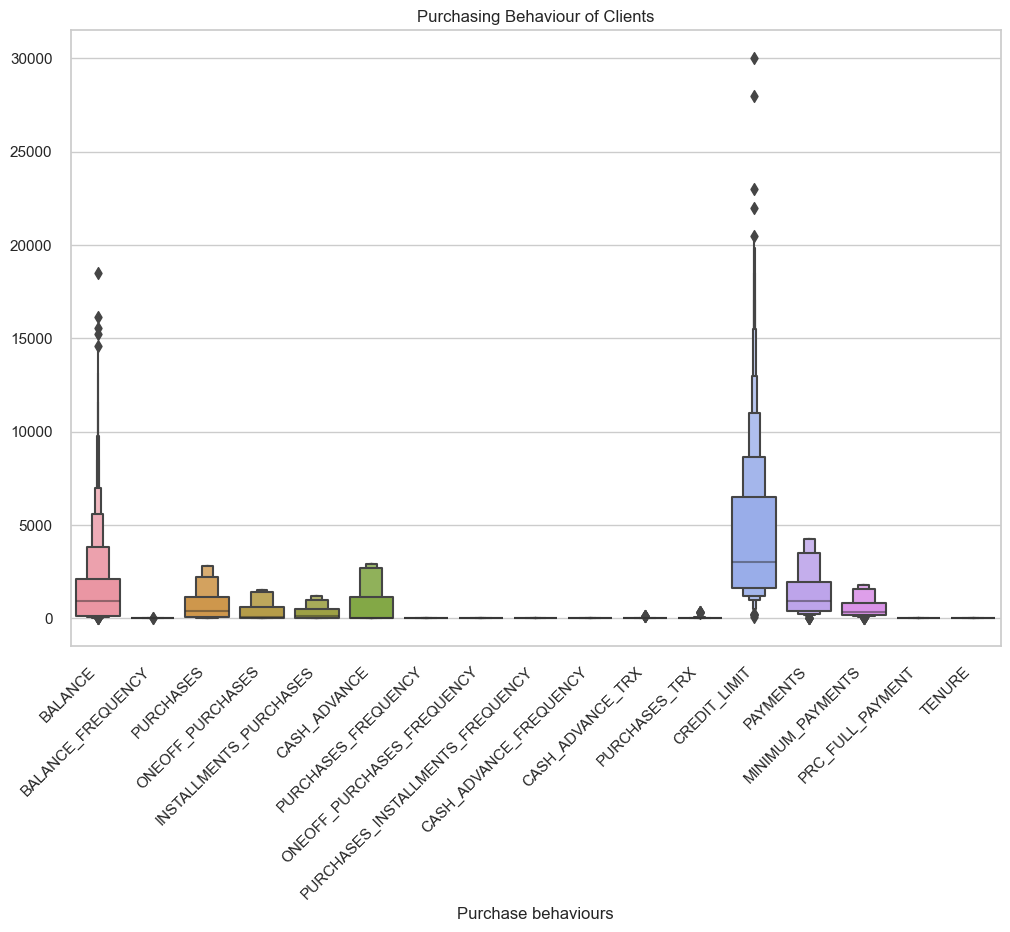

In [107]:
# Membuat figure dengan ukuran 12x8 inci
plt.figure(figsize=(12, 8))

# Membuat boxen plot menggunakan seaborn dengan data yang diberikan
ax = sns.boxenplot(data=data)

# Menyesuaikan label sumbu x agar miring dengan rotasi 45 derajat dan penyesuaian horizontal ke kanan
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Menambahkan label pada sumbu x
plt.xlabel('Purchase behaviours')

# Menambahkan judul plot
plt.title('Purchasing Behaviour of Clients')

# Menampilkan plot
plt.show()

### **6.5. Melakukan Duplikasi Dataset Asli yang Sudah Bersihkan**

Karena kita akan membutuhkan data asli untuk diimplementasikan dengan model yang optimal, maka kita akan buat dataframe baru yang belum di scaled ataupun encode.

In [108]:
# Membuat duplikasi dari Data Frame data bernama data_duplicate
data_duplicate = data.copy()

### **6.6. Melakukan Scaling**

Sebelum melakukan PCA atau pengurangan dimensional, kita perlu melakukan scaling terhadap data numerical.

Penting untuk menskalakan data menggunakan `StandardScaler karena PCA sangat sensitif terhadap perbedaan skala antar variabel` dimana PCA berusaha mempertahankan varians maksimal dalam data.

Dengan menggunakan StandardScaler, kita `membuat setiap variabel memiliki rata-rata nol dan deviasi standar satu`. Hal ini memastikan bahwa semua variabel memiliki skala yang serupa, sehingga PCA dapat bekerja lebih efektif dalam mengekstrak pola dan informasi penting dari data.

Kita mulai dengan memprint dataset sebelum scale sebagai pembanding.

In [109]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,757.964752,0.875,157.4,157.4,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,1795.542484,0.0,8
3,264.566591,0.375,1150.0,1150.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.0,600.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8
5,611.561026,1.000,765.0,765.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,2000.0,204.464151,146.352314,0.0,8
7,105.333584,0.375,306.0,306.0,0.0,0.0,0.125,0.125,0.0,0.0,0,2,6000.0,101.986927,118.324082,0.0,8


Kita akan lakukan scaling menggunakan standard scaler.

In [110]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data untuk melakukan Standard Scaling pada semua kolom
data[data.columns] = scaler.fit_transform(data[data.columns])

Kita print kembali hasil scale untuk mengecek.

In [111]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,-0.405218,-0.095058,-0.661310,-0.393824,-0.752032,-0.681796,-0.921465,-0.270465,-0.92429,-0.687774,-0.466721,-0.358173,-0.914680,0.070782,2.160763,-0.531542,-2.726734
3,-0.642003,-2.491318,0.437156,1.497966,-0.752032,-0.681796,-0.921465,-0.270465,-0.92429,-0.687774,-0.466721,-0.551480,-0.914680,1.261289,-0.872038,-0.531542,-2.726734
4,-0.557517,0.504007,-0.171505,0.449725,-0.752032,-0.681796,-0.921465,-0.270465,-0.92429,-0.687774,-0.466721,-0.551480,-0.969785,-0.921369,-0.779079,-0.531542,-2.726734
5,-0.475478,0.504007,0.011094,0.764197,-0.752032,-0.681796,-0.921465,-0.270465,-0.92429,-0.687774,-0.466721,-0.551480,-0.694258,-0.929787,-0.763993,-0.531542,-2.726734
7,-0.718420,-2.491318,-0.496861,-0.110608,-0.752032,-0.681796,-0.921465,-0.270465,-0.92429,-0.687774,-0.466721,-0.512819,0.407847,-1.009271,-0.813700,-0.531542,-2.726734


### **6.7. Dimensionality Reduction: Principal Component Analysis (PCA)**

Sebelum melakukan clustering, kita akan melakukan reduksi dimensi menggunakan PCA karena kita memiliki fitur yang banyak dan memungkinkan untuk mendapatkan hasil pengelompoknan yang lebih baik.

In [112]:
# Pengurangan Dimensi menggunakan PCA
pca = PCA()
pca.fit(data)

PCA()

Setelah melakukan PCA, kita akan visualisasikan rasio antara banyak fitur dengan persen pemahaman data keseluruhan.

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

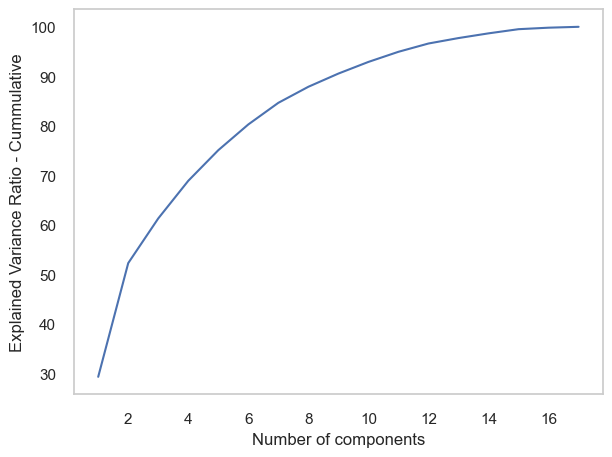

In [113]:
# Plot Kumulatif dari Rasio Varians yang Dijelaskan
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 2 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4320 non-null   float64
 1   BALANCE_FREQUENCY                 4320 non-null   float64
 2   PURCHASES                         4320 non-null   float64
 3   ONEOFF_PURCHASES                  4320 non-null   float64
 4   INSTALLMENTS_PURCHASES            4320 non-null   float64
 5   CASH_ADVANCE                      4320 non-null   float64
 6   PURCHASES_FREQUENCY               4320 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4320 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4320 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4320 non-null   float64
 10  CASH_ADVANCE_TRX                  4320 non-null   float64
 11  PURCHASES_TRX                     4320 non-null   float64
 12  CREDIT

In [115]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Dari hasil plot, `jika kita gunakan 2 kolom dari 17 kolom , kita hanya akan mendapatkan 40%-an informasi dari keseluruhan data`.

Namun, `bila kita menggunakan 16 dari 17 kolom, kita mendapatkan informasi sebanyak 95% keatas dari data keseluruhan`.

Jika `kita menginginkan pemahaman data sebesar 90-95%, kita dapat memilih antara 11-14 kolom`.

Selanjutnya kita akan melihat visualisasi eigen valuesnya.

Text(0, 0.5, 'Eigenvalues')

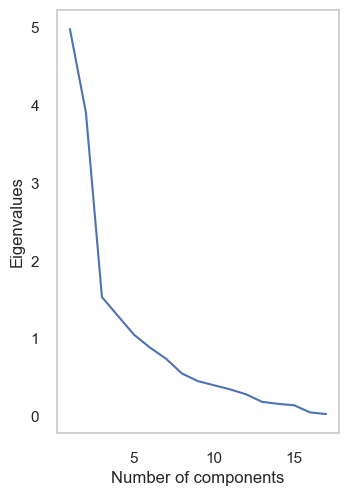

In [116]:
# Plot Nilai Eigen
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Berikutnya kita akan mencari tahu berapa kolom yang kita perlukan bila kita ingin mendapatkan setidaknya 95% informasi dari total data.

In [117]:
# Periksa jumlah fitur jika kita ingin menyimpan 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

12

Dari query syntax ditas, `kita temukan bahwa dari 17 kolom awal, kita dapat menurunkan dimensinya hingga 12 kolom dengan tetap mempertahankan pemhaman informasi diatas 95%`.

In [118]:
# Mari kita latih model dengan 95% informasi kumpulan data asli

pca = PCA(n_components=0.95)
pca.fit(data)

data_scaled_pca = pca.transform(data)

---
## **7. Model Definition**

Selanjutnya kita akan mendefinisikan model K-Means yang akan kita gunakan.

In [119]:
km = KMeans(n_clusters = 5,
            init = 'k-means++',
            max_iter = 300,
            n_init = 10,
            random_state = 42)

Untuk n-clusternya, kita akan pilih 5 karena umumnya segemntasi kredit tidak lebih dri 5 biasanya.

---
## **8. Model Training**

Selanjutanya kita akan mentraining model K-Means kita terhadap data yang sudah di scale dan PCA.

In [120]:
km.fit(data_scaled_pca)

KMeans(n_clusters=5, n_init=10, random_state=42)

---
## **9. Model Evaluation**

### **9.1. Temukan Jumlah Cluster yang Optimal**

Selanjutnya kita akan mencari tahu berapa banyak cluster yang kita perlukan

untuk mengetahuinya, kita akan mencoba mencari jumlah cluster yang optimal antara 2 cluster hingga 15 cluster.

Kita akan menentukannya dengan memanfaatkan metode elbow, silhoutte, dan yellowbrick.

In [121]:
inertias=[]
sil_scores=[]
K=[n for n in range(2,15)]
for k in K:
    kmean_clust=KMeans(n_clusters=k).fit(data_scaled_pca)
    inertias.append(kmean_clust.inertia_)
    sil_scores.append(silhouette_score(data_scaled_pca,kmean_clust.labels_))

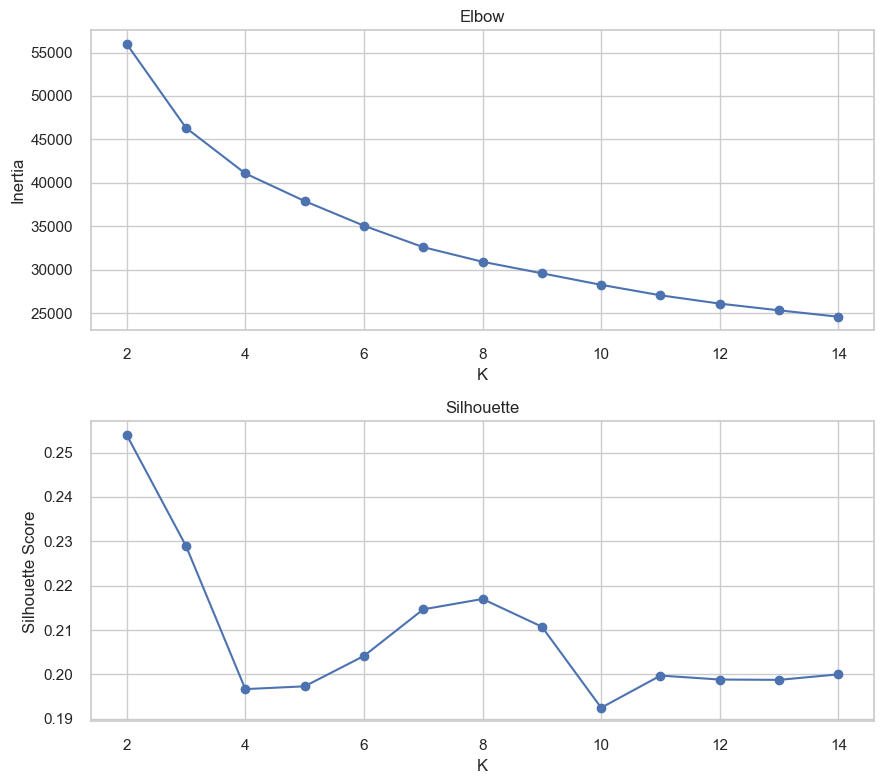

In [122]:
fig,ax=plt.subplots(nrows=2,figsize=(9,8))
ax[0].plot(K,inertias)
ax[0].scatter(K,inertias)
ax[0].set_xlabel('K')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow')

ax[1].plot(K,sil_scores)
ax[1].scatter(K,sil_scores)
ax[1].set_xlabel('K')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette')

plt.tight_layout()

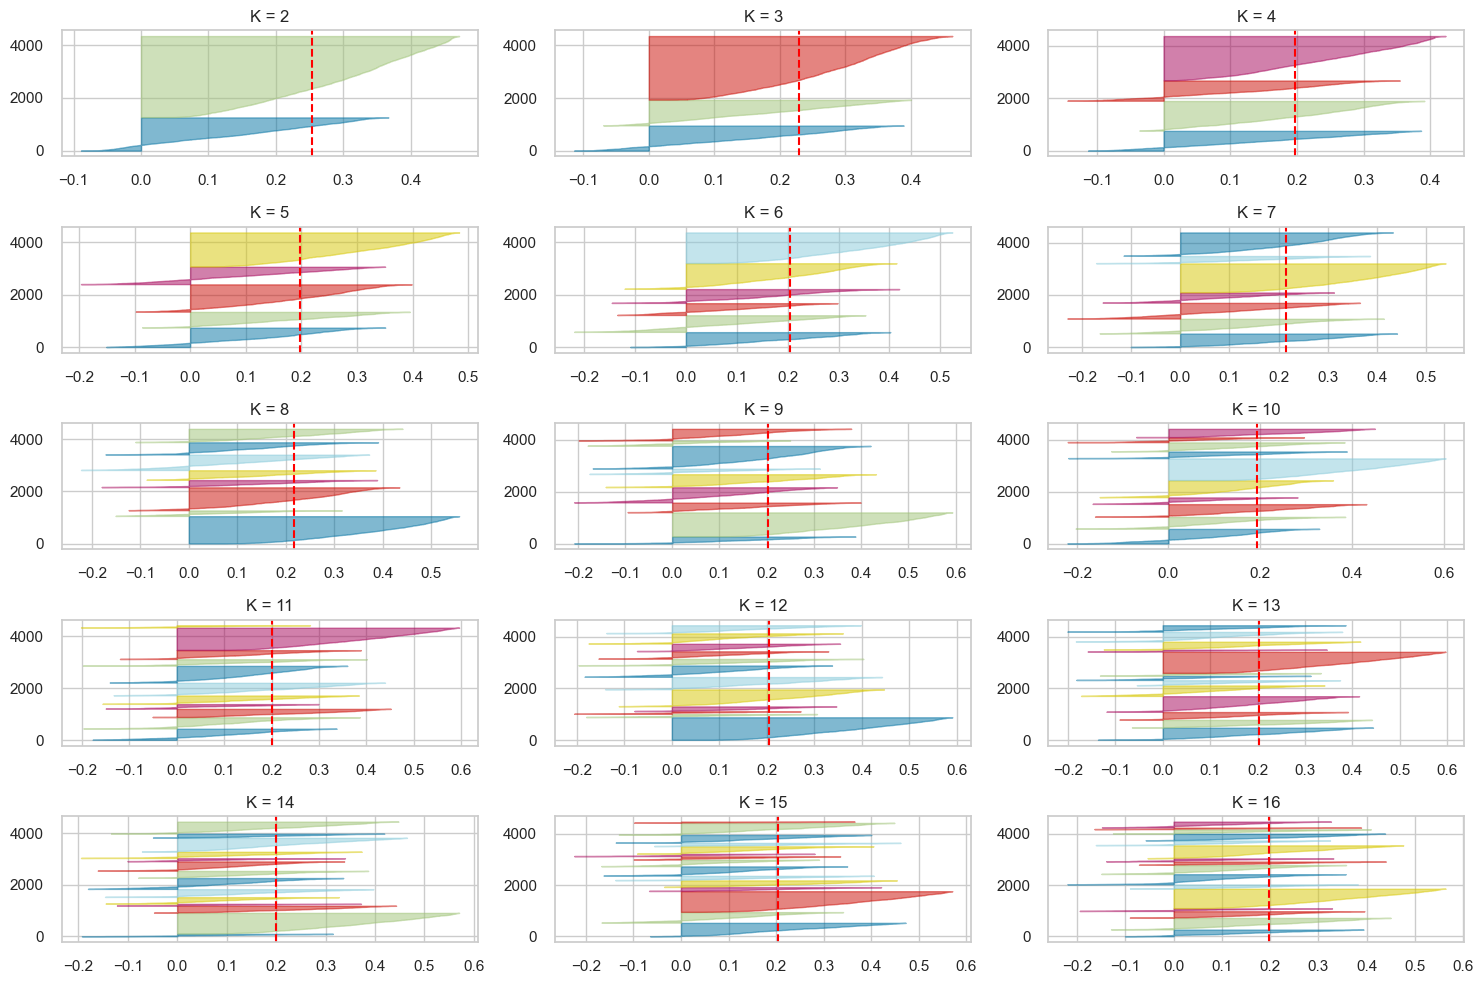

In [123]:
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(data_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Berdasarkan plot di atas, kita bisa lihat bahwa `semakin banyak clusternya, inertia nya semakin kecil`.

Inertia yang optimal adalah diatas `45,000++`.

Meskipun `n_cluster=2` menghasilkan skor siluet tertinggi, distribusi data di setiap cluster tampaknya sangat tidak seimbang.

Dilihat dari intertia (error) dan silhoutte score (mendekati 1 semakin baik), maka `kita akan memilih menggunakan cluster sebanyak 3`

Karena banyak kluster yang kita pilih adalah 3, maka `kita mendapatkan pemahaman data nya sekitar 20%-25% dari keseluruhan informasi`.

Berdasarkan hasil plot sebaran cluster, nampaknya `n_clusters=3` memberikan visualisasi yang baik dimana ekornya tidak terlalu panjang dan tidak banyak.

**Oleh karena itu, dapat disimpulkan bahwa berdasarkan Silhouette Plot, jumlah cluster yang optimal adalah `n_clusters=3`.**

---
## **10. Optimal Model**

### **10.1. Optimal Model - Model Definition**

Kita akan mendefinisikan kembali best model (optimal)

In [124]:
km_optimal_model = KMeans(n_clusters = 3,
            init = 'k-means++',
            max_iter = 300,
            n_init = 10,
            random_state = 42)

### **10.2. Optimal Model - Model Predict**

Kemudian kita akan menjalankan predict dari model optimal kita.

In [125]:
# Train with optimal number of clusters
pred = km_optimal_model.fit_predict(data_scaled_pca)
pred

array([2, 2, 2, ..., 1, 1, 1])

### **10.3. Optimal Model - Model Performance**

In [126]:
# WCSS and Silhouette of final model

silhouette_final = silhouette_score(data_scaled_pca, pred)

final_model_report = {
    'n_components': pca.n_components_,
    'n_cluster': km_optimal_model.n_clusters,
    'wcss': km_optimal_model.inertia_,
    'silhouette_score': silhouette_final
}
final_model_report

{'n_components': 12,
 'n_cluster': 3,
 'wcss': 46330.849686149,
 'silhouette_score': 0.22894612553786198}

Dari hasil pengecekan diatas, kita mendapati bahwa model optimal kita memiliki dimensi yang hanya menyisakan 12 kolom, memiliki pembagian 3 cluster, dengan inertianya 46330.85, dan nilai silhoutte scornya adalah 0.22 atau memiliki pehaman 22% dari data keseluruhan.

### **10.4. Menambahkan kolom baru hasil cluster**

Berikutnya kita akan menambahkan kolom baru yang berisikan hasil cluster ke data asli.

In [127]:
data_duplicate['CLUSTER'] = pred
data_duplicate

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2,757.964752,0.875,157.4,157.4,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,1795.542484,0.0,8,2
3,264.566591,0.375,1150.0,1150.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,2
4,440.613643,1.000,600.0,600.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,2
5,611.561026,1.000,765.0,765.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,2000.0,204.464151,146.352314,0.0,8,2
7,105.333584,0.375,306.0,306.0,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,2,6000.0,101.986927,118.324082,0.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.0,0.0,0.0,2904.232221,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,1795.542484,0.0,11,1
4471,1040.030221,1.000,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
4472,1322.818587,1.000,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
4473,1060.391273,1.000,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


### **10.5. Melakukan Visualisasi hasil clustering**

<Axes: >

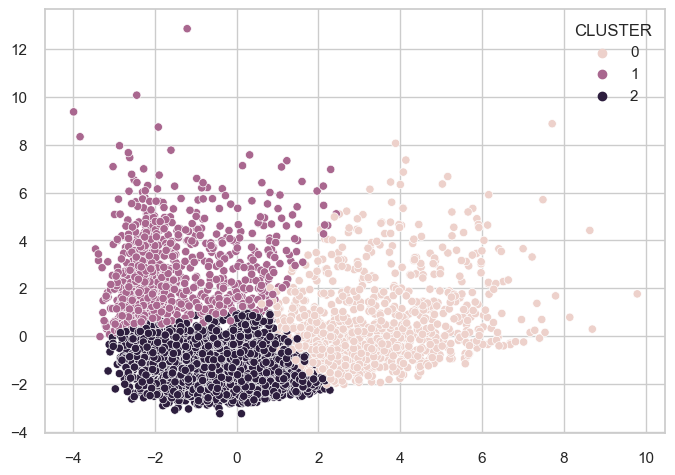

In [128]:
pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled_pca)

data_scaled_pca_2d = pca_2d.fit_transform(data_scaled_pca)

sns.scatterplot(x=data_scaled_pca_2d[:,0], y=data_scaled_pca_2d[:,1], hue=data_duplicate['CLUSTER'])

Kita temukan adanya 3 kluster dari data kita.

`Cluster 0 yang terletak di kanan memiliki kepadatan yang realtif lebih longgar dibanding 2 cluster lainnya dan tumpah tindih dengan 2 cluster lainnya.`

`Cluster 1 yang terletak di kiri atas memiliki kepadatan tinggi dan tumpah tindih dengan 2 cluster lainnya.`

`Cluster 2 yang terletak di kiri bawah memiliki kepadatan yang tidak dan tumpah tindih dengan 2 cluster lainnya.`

Cluster yang tumpang tindih ini diharapkan terjadi karena data diproyeksikan ke dalam sumbu 2 dimensi.

Datanya mungkin tampak sangat padat dalam 2D, namun belum tentu padat dalam dimensi aslinya.

---
## **11. EDA 2**

Pada tahap ini kita akan melakukan pemhaman kedua terhadap data yang sudah memiliki klasifikasi/ kluster.

### **11.1. Menampilkan data keseluruhan**

In [129]:
data_duplicate.sample(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2991,1828.621960,1.0,0.00,0.00000,0.00000,689.185829,0.000000,0.000000,0.000000,0.083333,1,0,2300.0,2466.964742,471.940554,0.000000,12,2
458,80.545433,1.0,374.37,0.00000,374.37000,0.000000,1.000000,0.000000,1.000000,0.000000,0,27,1500.0,249.786550,164.519177,0.000000,12,2
2083,182.171771,1.0,270.65,45.65000,225.00000,0.000000,0.833333,0.083333,0.750000,0.000000,0,10,1000.0,216.489485,190.287126,0.000000,12,2
4352,1850.509525,1.0,0.00,0.00000,0.00000,218.731138,0.000000,0.000000,0.000000,0.416667,5,0,2000.0,498.436823,401.488090,0.000000,12,2
3778,1746.714825,1.0,0.00,0.00000,0.00000,113.673261,0.000000,0.000000,0.000000,0.166667,2,0,1800.0,354.637009,756.052579,0.000000,12,2
2407,529.415371,0.5,0.00,0.00000,0.00000,1409.048702,0.000000,0.000000,0.000000,0.250000,4,0,1500.0,1417.666972,59.169474,0.142857,8,2
3899,1986.558317,1.0,0.00,0.00000,0.00000,872.861808,0.000000,0.000000,0.000000,0.166667,4,0,6500.0,653.211583,587.112789,0.000000,12,2
3945,661.135323,1.0,568.81,141.69000,427.12000,618.553380,0.750000,0.083333,0.666667,0.166667,2,10,1700.0,239.759567,208.292600,0.000000,12,2
3400,2779.833422,1.0,0.00,0.00000,0.00000,1492.253356,0.000000,0.000000,0.000000,0.727273,14,0,3000.0,1708.484919,1285.667565,0.000000,11,1
666,788.257316,1.0,2783.91,1485.68125,1174.74375,0.000000,1.000000,1.000000,1.000000,0.000000,0,128,12000.0,4241.099353,243.938058,1.000000,12,0


### **11.2. Melihat jenis-jenis klasifikasi**

In [130]:
data_duplicate['CLUSTER'].unique()

array([2, 0, 1])

Kita temukan bahwa kita memiliki 3 cluster atau penggolongan.

### **11.3. Membuat dataframe baru berdasarkan cluster**

In [131]:
data_duplicate_cluster_0 = data_duplicate[data_duplicate['CLUSTER']==0]
data_duplicate_cluster_1 = data_duplicate[data_duplicate['CLUSTER']==1]
data_duplicate_cluster_2 = data_duplicate[data_duplicate['CLUSTER']==2]

### **11.4. Melihat perbandingan banyak data berdasarkan cluster**

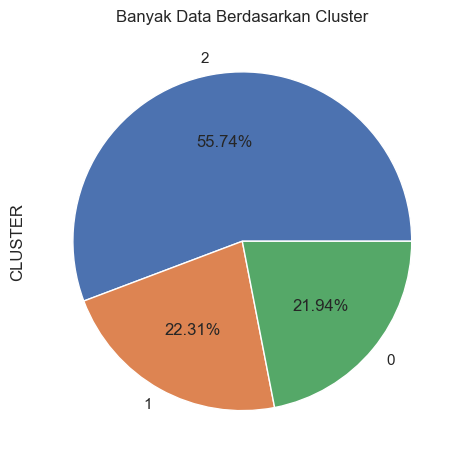

In [132]:
# Melakukan pembuatan plot untuk menampilkan pie chart yang menampilkan perbandingan data berdasarkan nama perushaan ('cab_type')
fig,ax1 = plt.subplots()

# Menghitung frekuensi masing-masing 'cab_type' menggunakan value_counts()
data_duplicate['CLUSTER'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1)

# Menambahkan judul pada pie chart
plt.title("Banyak Data Berdasarkan Cluster")

# Menampilkan pie chart
plt.show()

Dari hasil visualisasi, kita temukan bahwa data dengan kategori klasifikasi 2 merupakan data terbanyak yaitu sebesar 55.74% dari seluruh data, disusul oleh kategori 1 (22.31%) dan kategori 0 (21.94%).

### **11.5. Melihat data berdasarkan cluster**

In [133]:
data_duplicate_cluster_0.sample(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1128,337.317432,1.0,2783.91,1485.68125,1117.90,0.000000,1.000000,1.000000,0.583333,0.000000,0,27,3000.0,3690.904874,210.035264,1.000000,12,0
3981,3879.064446,1.0,2783.91,1485.68125,260.00,1959.013493,1.000000,0.833333,0.583333,0.166667,2,45,19000.0,4241.099353,968.363741,0.333333,12,0
1738,1861.087370,1.0,1752.06,1417.18000,334.88,0.000000,0.916667,0.583333,0.666667,0.000000,0,32,3500.0,737.941555,437.075647,0.000000,12,0


In [134]:
data_duplicate_cluster_1.sample(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2461,6388.108487,1.000000,0.00,0.0,0.00000,2904.232221,0.000000,0.000000,0.000000,0.250000,3,0,8000.0,4241.099353,1795.542484,0.083333,12,1
3656,5259.140390,0.888889,2659.35,813.0,1174.74375,2904.232221,0.888889,0.222222,0.777778,0.333333,34,38,6000.0,2249.612405,1795.542484,0.000000,9,1
3905,5335.302925,1.000000,0.00,0.0,0.00000,468.958688,0.000000,0.000000,0.000000,0.166667,2,0,6000.0,1350.318606,1249.937085,0.000000,12,1


In [135]:
data_duplicate_cluster_2.sample(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
95,440.161534,1.0,365.00,116.00,249.00,0.0,0.250000,0.083333,0.166667,0.0,0,6,800.0,230.655936,209.080877,0.000000,12,2
1727,43.354029,1.0,617.34,0.00,617.34,0.0,0.916667,0.000000,0.916667,0.0,0,19,1200.0,564.845244,160.071637,0.583333,12,2
607,27.164388,1.0,554.35,464.63,89.72,0.0,1.000000,1.000000,0.166667,0.0,0,16,3000.0,446.722613,145.306865,0.272727,12,2


### **11.6. Melihat distribusi berdasarkan cluster**

In [136]:
print('Cluster 0')
display(data_duplicate_cluster_0.agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max']).T.sort_values(by='mean'))
print('\n\n')

print('Cluster 1')
display(data_duplicate_cluster_1.agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max']).T.sort_values(by='mean'))
print('\n\n')

print('Cluster 2')
display(data_duplicate_cluster_2.agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max']).T.sort_values(by='mean'))
print('\n\n')

Cluster 0


,count,skew,kurt,std,mean,median,min,max
CLUSTER,948.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,948.0,2.787206,8.601656,0.156614,0.076462,0.000000,0.000000,1.000000
PRC_FULL_PAYMENT,948.0,1.105558,-0.417239,0.362843,0.256873,0.000000,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,948.0,-0.211250,-1.302138,0.339700,0.574621,0.583333,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,948.0,-0.852139,-0.710042,0.355826,0.686567,0.833333,0.000000,1.000000
PURCHASES_FREQUENCY,948.0,-2.441280,6.459858,0.157821,0.914684,1.000000,0.083333,1.000000
BALANCE_FREQUENCY,948.0,-4.884669,29.475680,0.083720,0.975730,1.000000,0.181818,1.000000
CASH_ADVANCE_TRX,948.0,4.762460,27.750011,5.446251,1.978903,0.000000,0.000000,51.000000
TENURE,948.0,-6.761586,50.939830,0.596178,11.890295,12.000000,6.000000,12.000000
PURCHASES_TRX,948.0,3.089408,14.557640,39.997393,46.114979,34.500000,2.000000,347.000000





Cluster 1


,count,skew,kurt,std,mean,median,min,max
PRC_FULL_PAYMENT,964.0,5.536362,41.672669,0.083854,0.026562,0.000000,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,964.0,2.816221,8.913055,0.173703,0.087248,0.000000,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,964.0,2.200515,3.602483,0.261543,0.119487,0.000000,0.000000,1.000000
PURCHASES_FREQUENCY,964.0,1.477596,0.831890,0.306466,0.197002,0.000000,0.000000,1.000000
CASH_ADVANCE_FREQUENCY,964.0,0.669778,-0.030568,0.217594,0.394453,0.333333,0.000000,1.000000
BALANCE_FREQUENCY,964.0,-3.124851,10.134947,0.125005,0.950168,1.000000,0.181818,1.000000
CLUSTER,964.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES_TRX,964.0,3.034643,12.939545,7.705966,4.092324,0.000000,0.000000,68.000000
CASH_ADVANCE_TRX,964.0,4.871485,38.615365,11.310862,10.616183,8.000000,0.000000,123.000000
TENURE,964.0,-2.534384,5.511285,1.411803,11.400415,12.000000,6.000000,12.000000





Cluster 2


,count,skew,kurt,std,mean,median,min,max
CASH_ADVANCE_FREQUENCY,2408.0,2.038279,4.480194,0.102939,0.060801,0.000000,0.000000,0.714286
ONEOFF_PURCHASES_FREQUENCY,2408.0,2.600169,7.504975,0.190822,0.109082,0.000000,0.000000,1.000000
PRC_FULL_PAYMENT,2408.0,1.791621,1.916335,0.297266,0.167413,0.000000,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,2408.0,0.598631,-1.211887,0.376400,0.341778,0.166667,0.000000,1.000000
PURCHASES_FREQUENCY,2408.0,0.241653,-1.429411,0.370458,0.451450,0.416667,0.000000,1.000000
BALANCE_FREQUENCY,2408.0,-1.421653,0.725503,0.249822,0.840836,1.000000,0.000000,1.000000
CASH_ADVANCE_TRX,2408.0,2.683105,9.032339,1.929302,1.026163,0.000000,0.000000,15.000000
CLUSTER,2408.0,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000
PURCHASES_TRX,2408.0,2.020872,7.828344,7.989708,7.591362,6.000000,0.000000,78.000000
TENURE,2408.0,-2.709480,6.243301,1.421056,11.453073,12.000000,6.000000,12.000000


### **11.7. Melihat Perbandingan Purchases Credit Limit Setiap Clusternya**

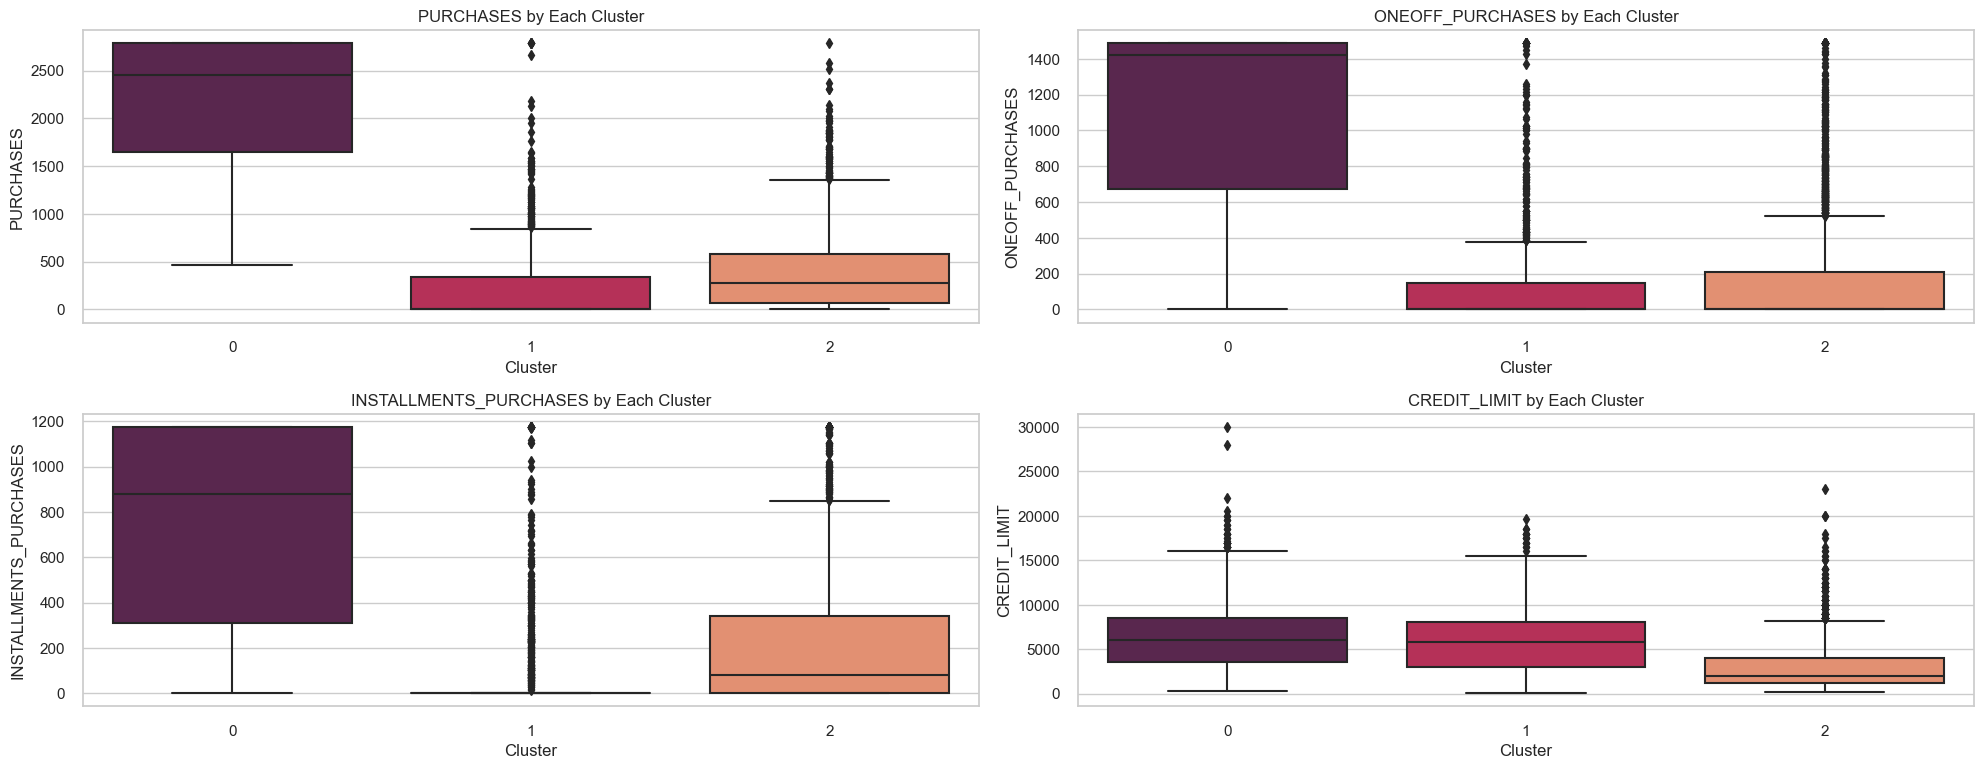

In [137]:
# Purchases by cluster
# Daftar kolom numerik yang ingin diplot
numeric_columns = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT']

# Ukuran plot
plt.figure(figsize=(20, 15))

# Loop melalui setiap kolom numerik
for i, column in enumerate(numeric_columns):
    # Membuat subplot untuk setiap kolom numerik terhadap 'CLUSTER'
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='CLUSTER', y=column, data=data_duplicate, palette='rocket')
    plt.title(f'{column} by Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

# Mengatur tata letak subplot agar lebih rapi
plt.tight_layout()
plt.show()

### **11.8. Melihat Perbandingan Balance Setiap Clusternya**

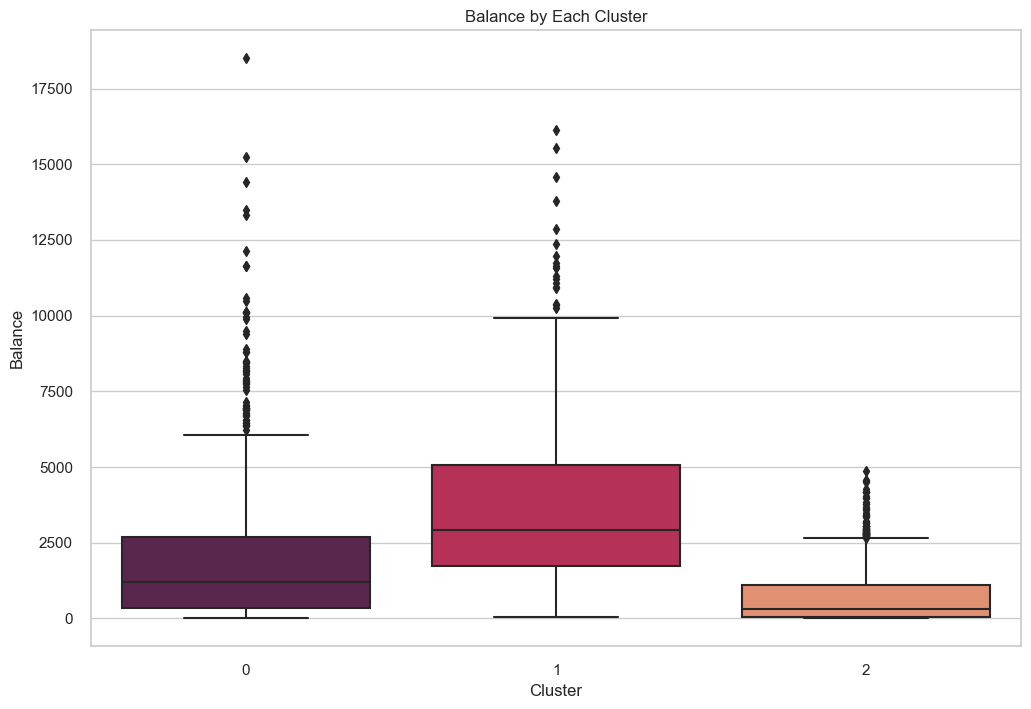

In [138]:
# Balance by cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='CLUSTER', y='BALANCE', data=data_duplicate, palette='rocket')
plt.title('Balance by Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

### **11.9. Melihat Perbandingan Payments Setiap Clusternya**

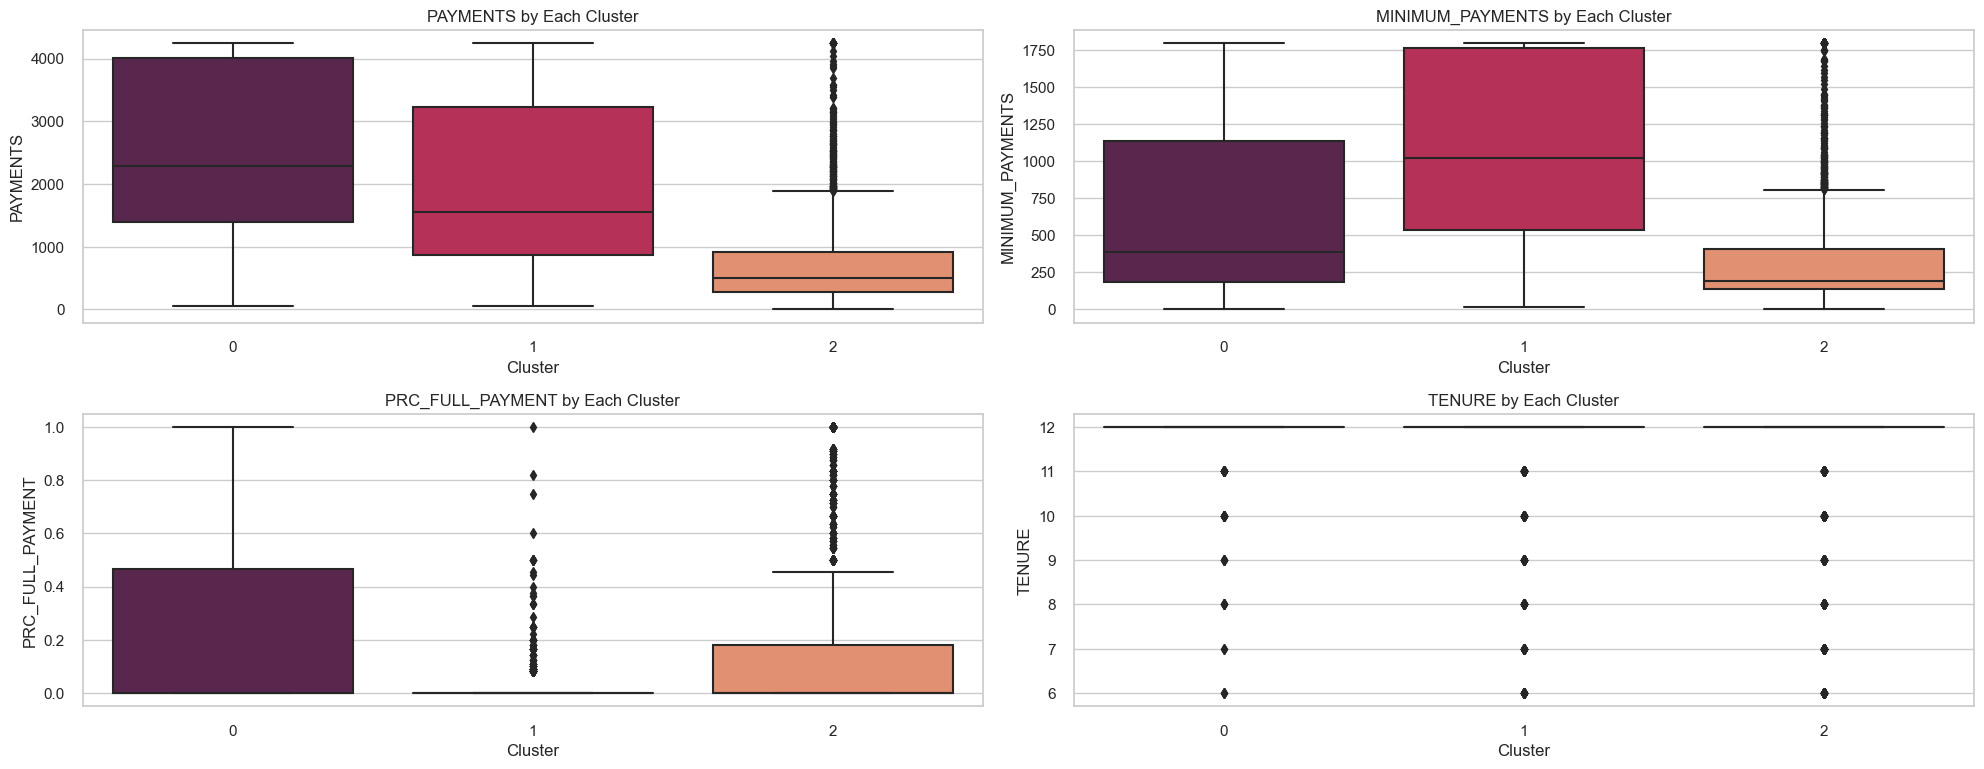

In [139]:
# Payments by cluster
# Daftar kolom numerik yang ingin diplot
numeric_columns = ['PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Ukuran plot
plt.figure(figsize=(20, 15))

# Loop melalui setiap kolom numerik
for i, column in enumerate(numeric_columns):
    # Membuat subplot untuk setiap kolom numerik terhadap 'CLUSTER'
    plt.subplot(4, 2, i+1)
    sns.boxplot(x='CLUSTER', y=column, data=data_duplicate, palette='rocket')
    plt.title(f'{column} by Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

# Mengatur tata letak subplot agar lebih rapi
plt.tight_layout()
plt.show()

### **11.10. Kesimpulan EDA 2**

Ada beberapa perbedaan dalam perilaku klien dari masing-masing cluster.

- Klaster 0 adalah nasabah dengan purchases tinggi (baik angsuran maupun tanpa cicilan) dengan credit limit tinggi, memiliki saldo sisa pemakaian yang sedang, dan payments tinggi, minimum tagihan sedang serta memiliki presentase full payment yang relatif tinggi dibanding cluster lainnya.
 
- Cluster 1 adalah nasabah dengan purchases rendah (baik angsuran maupun tanpa cicilan) dengan credit limit sedang, memiliki saldo sisa pemakaianldo yang tinggi, dan payments sedang, minimum tagihan tinggi serta memiliki presentase full payment yang sangat rendah dibanding cluster lainnya.

- Cluster 2 adalah nasabah dengan purchases rendah (baik angsuran maupun tanpa cicilan) dengan credit limit sangat rendah, memiliki saldo sisa pemakaian yang rendah, dan payments rendah, minimum tagihan rendah serta memiliki presentase full payment yang rendah dibanding cluster lainnya.

---
## **12. Model Saving**

In [140]:
list_used_col = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
                 'TENURE']

In [141]:
# Menyimpan File

# Menyimpan list kolom yang digunakan model ke dalam file JSON
with open('list_used_col.txt', 'w') as file_1:
  json.dump(list_used_col, file_1)

# Menyimpan model scaler ke dalam file pickle
with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

# Menyimpan model PCA ke dalam file pickle
with open('model_pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

# Menyimpan model KMeans ke dalam file pickle
with open('model_kmeans.pkl', 'wb') as file_4:
  pickle.dump(km_optimal_model, file_4)

---
## **13. Model Inference**

Model Inference dilakukan di notebook lain (Inference-Clustering-Model-for-Credit-Customer-Segmentation.ipynb)

---
## **14. Pengambilan Kesimpulan**

Untuk melakukan segmentasi pelanggan nasabah kartu kredit suatu bank, dapat dilakukan dengan model clustering yaitu K-Means. Setelah dilakukan pemodelan, kita mendapati pembagian segmentasi menjadi 3 kelompiok.

Segementasi 0 adalah nasabah dengan volume transaksi yang tinggi (baik angsuran maupun tanpa cicilan), memiliki credit limit tinggi, memiliki saldo sisa pemakaian yang sedang, tagihan kartu kredit yang tinggi, minimum tagihan sedang, dan presentase full payment tinggi. Segemntasi ini kemungkinan besar adalah mereka yang tergolong nasabah prioritas.

Segmentasi 1 adalah nasabah dengan volume transaksi yang rendah (baik angsuran maupun tanpa cicilan), memiliki credit limit sedang, memiliki saldo sisa pemakaian yang tinggi, tagihan kartu kredit yang sedang, minimum tagihan tinggi, dan presentase full payment rendah. Segmentasi ini kemugnkinan besar adalah mereka yang jarang menggunakan kartu kredit untuk pembayaran, dimana saldo sisa mereka sering belum terpakai, dan sekali transaksi unumnya bernilai tinggi dan diangsur.

Segmentasi 2 adalah nasabah dengan volume transaksi yang rendah (baik angsuran maupun tanpa cicilan), memiliki credit limit rendah, memiliki saldo sisa pemakaian yang rendah, tagihan kartu kredit yang rendah, minimum tagihan rendah, dan presentase full payment rendah. Segemntasi ini kemungkinan besar adalah mereka yang sering menggunakan kartu kredit untuk membayar cicilan.

Dari ketiga segemntasi pelanggan yang sudah didapatkan, bank dapat menyesuaikan skema marketing dan bisnis mereka sesuai dengan segmentasi pelanggannya seperti menentukan benefit, promo, dan strategi bisnis lainnya.